# OPM Data Separation Analysis
<i><b>
Christopher Boomhower<sub>1</sub>, Stacey Fabricant<sub>2</sub>, Alex Frye<sub>1</sub>, David Mumford<sub>2</sub>, Michael Smith<sub>1</sub>, Lindsay Vitovsky<sub>1</sub>

<sub>1</sub> Southern Methodis Univeristy, Dallas, TX, US
<sub>2</sub> Penn Mutual Life Insurance Co, Horsham PA
</i></b>


### Introduction

background text...

**our intent is to: 1)..2)...3)........**

### Data Understanding

Data Source Background Text & citation links

Dataset Attribute Descriptions



### Load the Data

To begin our analysis, we need to load the data from our 89 source .txt files. Data is separated into two separate groups of files; Separation and Non-Separation, thus data is loaded in two separate phases, then unioned together. Once data is loaded, Steps taken to remove non-US observations or those with no specified occupation, no specified salary, or no specified length of service level.  Of a total 8,423,336 observations, we end with 8,232,375 after removal of these observations.

In [67]:
## Import libraries
import pickle
import os
import psutil
import glob
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import requests
import json
import missingno as msno
import prettytable
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

## Library Options

pd.options.mode.chained_assignment = None

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
## Pre-defined Functions for use later
def pickleObject(objectname, filename, filepath = "PickleJar/"):
    fullpicklepath = "{0}{1}.pkl".format(filepath, filename)
    # Create a variable to pickle and open it in write mode
    picklefile = open(fullpicklepath, 'wb')
    pickle.dump(objectname, picklefile)
    picklefile.close()
    
def unpickleObject(filename, filepath = "PickleJar/"):
    fullunpicklepath = "{0}{1}.pkl".format(filepath, filename)
    # Create an variable to pickle and open it in write mode
    unpicklefile = open(fullunpicklepath, 'rb')
    unpickleObject = pickle.load(unpicklefile)
    unpicklefile.close()

    return unpickleObject
    
def clear_display():
    from IPython.display import clear_output
    
## Pre-defined variables for use later
dataOPMPath = "dataOPM"
dataEMPPath = "dataEMP"
PickleJarPath = "PickleJar"

In [3]:
%%time

## Load OPMSeparation Files

OPMDataFiles = glob.glob(os.path.join(dataOPMPath, "*.txt"))

for i in range(0,len(OPMDataFiles)):
    OPMDataFiles[i] = OPMDataFiles[i].replace("\\","/")

OPMDataList = []

for i,j in zip(OPMDataFiles,range(0,len(OPMDataFiles))):
    OPMDataList.append(pd.read_csv(i, dtype = 'str'))
    display(OPMDataList[j].head())

## Load the SEPDATA_FY2015 file into it's own object
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/SEPDATA_FY2015.txt']
OPMDataOrig = OPMDataList[indexes[0]]



,AGELVL,AGELVLT
0,A,Less than 20
1,B,20-24
2,C,25-29
3,D,30-34
4,E,35-39


,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUB,AGYSUBT
0,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF**,AF**-INVALID
1,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF02,AF02-AIR FORCE INSPECTION AGENCY (FO)
2,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF03,AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...
3,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF06,AF06-AIR FORCE AUDIT AGENCY
4,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF07,AF07-AIR FORCE OFFICE OF SPECIAL INVESTIGATIONS


,QTR,QTRT,EFDATE,EFDATET
0,1,OCT-DEC 2014,201410,OCT 2014
1,1,OCT-DEC 2014,201411,NOV 2014
2,1,OCT-DEC 2014,201412,DEC 2014
3,2,JAN-MAR 2015,201501,JAN 2015
4,2,JAN-MAR 2015,201502,FEB 2015


,GENDER,GENDERT
0,F,Female
1,M,Male
2,Z,Unspecified


,GSEGRD
0,**
1,01
2,02
3,03
4,04


,LOCTYP,LOCTYPT,LOC,LOCT
0,1,United States,01,01-ALABAMA
1,1,United States,02,02-ALASKA
2,1,United States,04,04-ARIZONA
3,1,United States,05,05-ARKANSAS
4,1,United States,06,06-CALIFORNIA


,LOSLVL,LOSLVLT
0,A,Less than 1 year
1,B,1 - 2 years
2,C,3 - 4 years
3,D,5 - 9 years
4,E,10 - 14 years


,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCC,OCCT
0,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0006,0006-CORRECTIONAL INSTITUTION ADMINISTRATION
1,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0007,0007-CORRECTIONAL OFFICER
2,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0017,0017-EXPLOSIVES SAFETY
3,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0018,0018-SAFETY AND OCCUPATIONAL HEALTH MANAGEMENT
4,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0019,0019-SAFETY TECHNICIAN


,PATCO,PATCOT
0,1,Professional
1,2,Administrative
2,3,Technical
3,4,Clerical
4,5,Other White Collar


,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,PPGRD
0,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-03
1,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-04
2,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-05
3,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-06
4,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-07


,SALLVL,SALLVLT
0,A,"Less than $20,000"
1,B,"$20,000 - $29,999"
2,C,"$30,000 - $39,999"
3,D,"$40,000 - $49,999"
4,E,"$50,000 - $59,999"


,SEP,SEPT
0,SA,Transfer Out - Individual Transfer
1,SB,Transfer Out - Mass Transfer
2,SC,Quit
3,SD,Retirement - Voluntary
4,SE,Retirement - Early Out


,TOATYP,TOATYPT,TOA,TOAT
0,1,Permanent,10,10-Competitive Service - Career
1,1,Permanent,15,15-Competitive Service - Career-Conditional
2,1,Permanent,30,30-Excepted Service - Schedule A
3,1,Permanent,32,32-Excepted Service - Schedule B
4,1,Permanent,34,34-Excepted Service - Schedule C


,WSTYP,WSTYPT,WORKSCH,WORKSCHT
0,1,Full-time,B,B-Full-time Nonseasonal Baylor Plan
1,1,Full-time,F,F-Full-time Nonseasonal
2,1,Full-time,G,G-Full-time Seasonal
3,1,Full-time,H,H-Full-time On-call
4,2,Not Full-time,I,I-Intermittent Nonseasonal


,AGYSUB,SEP,EFDATE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS
0,AA00,SC,201507,C,M,11,A,11,0905,1,GS-11,F,40,F,1,063722,00.8
1,AA00,SD,201509,K,M,NaN,D,11,0301,2,EX-02,Z,46,F,1,NaN,08.1
2,AA00,SC,201506,D,F,15,C,11,0905,1,GS-15,L,30,F,1,126245,04.8
3,AF**,SA,201503,H,M,11,C,48,2210,2,GS-11,F,10,F,1,066585,04.9
4,AF02,SD,201506,I,M,15,J,35,0301,2,GS-15,O,10,F,1,156737,39.8


CPU times: user 420 ms, sys: 37.2 ms, total: 457 ms
Wall time: 456 ms


In [4]:
%%time

#print(OPMDataFiles)

print(len(OPMDataOrig))

##### Merge / Modify Codes / Aggregate Attributes to be more descriptive per the metadata files

OPMDataMerged = OPMDataOrig.copy()

##AGYSUB - AGYTYP, AGY
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTagy.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'AGYSUB', how = 'left')

##EFDate - quarter, month
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTefdate.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'EFDATE', how = 'left')

##AGELVL - AGELVLT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTagelvl.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'AGELVL', how = 'left')

##LOSLVL - LOSLVLT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTloslvl.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'LOSLVL', how = 'left')

##LOC - LocTypeT, LocT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTloc.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'LOC', how = 'left')

##OCC - OCCTYPT, OCCFAM
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTocc.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'OCC', how = 'left')

##PATCO - PATCOT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTpatco.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'PATCO', how = 'left')

##PPGRD - PayPlan, PPGroup, PPTYP
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTppgrd.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'PPGRD', how = 'left')

##SALLVL - SALLVLT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTsallvl.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'SALLVL', how = 'left')

##TOA - TOATYP
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTtoa.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'TOA', how = 'left')

##WORKSCH - WSTYPT
indexes = [i for i,x in enumerate(OPMDataFiles) if x == 'dataOPM/DTwrksch.txt']
OPMDataMerged = OPMDataMerged.merge(OPMDataList[indexes[0]], on = 'WORKSCH', how = 'left')


## Modify Data Types for numeric objects
OPMDataMerged["SALARY"] = OPMDataMerged["SALARY"].apply(pd.to_numeric)
OPMDataMerged["COUNT"]  = OPMDataMerged["COUNT"].apply(pd.to_numeric)
OPMDataMerged["LOS"]    = OPMDataMerged["LOS"].apply(pd.to_numeric)

print("Original SEP data size of: "+str(len(OPMDataMerged)))
print("Removing "+str(len(OPMDataMerged[OPMDataMerged["LOCTYP"] != "1"]))+" Non-US observations.")

    ## Remove Non-US Data
OPMDataMerged = OPMDataMerged[OPMDataMerged["LOCTYP"] == "1"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["OCCTYP"] == "3"]))+" observations with no specified Occupation.")

   ## Remove Observations with no specified occupation
OPMDataMerged = OPMDataMerged[OPMDataMerged["OCCTYP"] != "3"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["SALLVL"] == "Z"]))+" observations with no specified Salary.")

   ## Remove Observations with no specified salary
OPMDataMerged = OPMDataMerged[OPMDataMerged["SALLVL"] != "Z"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["LOSLVL"] == "Z"]))+" observations with no specified Length of Service.")

   ## Remove Observations with no specified LOSLVL
OPMDataMerged = OPMDataMerged[OPMDataMerged["LOSLVL"] != "Z"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["AGELVL"] == "A"]))+" observations of Age Level A")

## Remove Observations from Age Level A (less than 20 years old)
OPMDataMerged = OPMDataMerged[OPMDataMerged["AGELVL"] != "A"]

print("Removing "+str(len(OPMDataMerged[OPMDataMerged["AGELVL"] == "Z"]))+" observations with no specified Age Level.")

   ## Remove Observations with no specified Age Level
OPMDataMerged = OPMDataMerged[OPMDataMerged["AGELVL"] != "Z"]

    ## Fix differences in spaces on WORKSCHT Column
OPMDataMerged["WORKSCHT"] = np.where(OPMDataMerged["WORKSCHT"].str[0]=="F", 'Full-time Nonseasonal',
                                np.where(OPMDataMerged["WORKSCHT"].str[0]=="I", 'Intermittent Nonseasonal',
                                         np.where(OPMDataMerged["WORKSCHT"].str[0]=="P", 'Part-time Nonseasonal',
                                                  np.where(OPMDataMerged["WORKSCHT"].str[0]=="G", 'Full-time Seasonal',
                                                        np.where(OPMDataMerged["WORKSCHT"].str[0]=="J", 'Intermittent Seasonal',
                                                                np.where(OPMDataMerged["WORKSCHT"].str[0]=="Q", 'Part-time Seasonal',
                                                                        np.where(OPMDataMerged["WORKSCHT"].str[0]=="T", 'Part-time Job Sharer Seasonal',
                                                                                np.where(OPMDataMerged["WORKSCHT"].str[0]=="S", 'Part-time Job Sharer Nonseasonal',
                                                                                        np.where(OPMDataMerged["WORKSCHT"].str[0]=="B", 'Full-time Nonseasonal Baylor Plan',
                                                                                                'NO WORK SCHEDULE REPORTED' ### ELSE case represents Night
                                                                                                 )
                                                                                         )
                                                                                 )
                                                                         )
                                                                 )
                                                          )
                                                 )
                                        )
                               )    

display(OPMDataMerged.head())
print("New SEP data size of: "+str(len(OPMDataMerged)))
display(OPMDataMerged.describe().transpose())
#del OPMDataList,OPMDataFiles

226357
Original SEP data size of: 226357
Removing 8021 Non-US observations.
Removing 55 observations with no specified Occupation.
Removing 1426 observations with no specified Salary.
Removing 3 observations with no specified Length of Service.
Removing 2570 observations of Age Level A
Removing 0 observations with no specified Age Level.


,AGYSUB,SEP,EFDATE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,QTR,QTRT,EFDATET,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT
0,AA00,SC,201507,C,M,11,A,11,0905,1,GS-11,F,40,F,1,63722.0,0.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,4,JUL-SEP 2015,JUL 2015,25-29,Less than 1 year,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",2,Non-permanent,40-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal
2,AA00,SC,201506,D,F,15,C,11,0905,1,GS-15,L,30,F,1,126245.0,4.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,3,APR-JUN 2015,JUN 2015,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$120,000 - $129,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal
3,AF**,SA,201503,H,M,11,C,48,2210,2,GS-11,F,10,F,1,66585.0,4.9,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF**-INVALID,2,JAN-MAR 2015,MAR 2015,50-54,3 - 4 years,1,United States,48-TEXAS,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,2210-INFORMATION TECHNOLOGY MANAGEMENT,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal
4,AF02,SD,201506,I,M,15,J,35,0301,2,GS-15,O,10,F,1,156737.0,39.8,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF02-AIR FORCE INSPECTION AGENCY (FO),3,APR-JUN 2015,JUN 2015,55-59,35 years or more,1,United States,35-NEW MEXICO,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$150,000 - $159,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal
5,AF03,SC,201509,H,M,13,B,06,0301,2,GS-13,I,15,F,1,92973.0,1.0,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...,4,JUL-SEP 2015,SEP 2015,50-54,1 - 2 years,1,United States,06-CALIFORNIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$90,000 - $99,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal


New SEP data size of: 214282


,count,mean,std,min,25%,50%,75%,max
COUNT,214282.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
SALARY,214282.0,66479.453855,39471.623281,3913.0,35830.0,54424.0,86910.0,393699.0
LOS,214282.0,11.708865,12.631714,0.0,1.3,6.2,20.4,71.5


CPU times: user 14.2 s, sys: 194 ms, total: 14.4 s
Wall time: 14.4 s


In [5]:
%%time

if os.path.isfile(PickleJarPath+"/EMPDataOrig4Q.pkl"):
    print("Found the File! Loading Pickle Now!")
    EMPDataOrig4Q = unpickleObject("EMPDataOrig4Q")
else:
    ## Load EMPData Files

    indexes = []
    EMPDataFiles = []
    EMPDataList = []
    EMPDataOrig = []

    for i,qtr in enumerate(["Q1", "Q2", "Q3", "Q4"]): 
        EMPDataFiles.append(glob.glob(os.path.join(dataEMPPath, qtr + "/*.txt")))

        for j in range(0,len(EMPDataFiles[i])):
            EMPDataFiles[i][j] = EMPDataFiles[i][j].replace("\\","/")

        EMPDataList.append([])

        for j,file in enumerate(EMPDataFiles[i]):
            EMPDataList[i].append(pd.read_csv(file, dtype = 'str'))
            if i == 0:
                display(EMPDataList[i][j].head())

        ## Load the FactData files into it's own object
        indexes.append([])
            ##[qtr][fileindex from EMPDataList]
        indexes[i]=[j for j,x in enumerate(EMPDataFiles[i]) if dataEMPPath + '/' + qtr + '/FACTDATA' in x]   

        EMPDataOrig.append([])

        EMPDataOrig[i] = pd.concat([EMPDataList[i][indexes[i][j]] for j in range(0,len(indexes[i]))]) 
        EMPDataOrig[i]["QTR"] = str(i+1)

            ## modify data type for numerics
        EMPDataOrig[i]["SALARY"] = EMPDataOrig[i]["SALARY"].str.replace(',', '').str.replace('$', '').str.replace(' ', '').apply(pd.to_numeric)
      
        ## Load Metadata
        ##AGYSUB - AGYTYP, AGY
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTagy.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'AGYSUB', how = 'left')

        ##AGELVL - AGELVLT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTagelvl.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'AGELVL', how = 'left')

        #LOSLVL - LOSLVLT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTloslvl.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'LOSLVL', how = 'left')
        EMPDataOrig[i]["LOS"] = EMPDataOrig[i]["LOS"].apply(pd.to_numeric)
        
        ##LOC - LocTypeT, LocT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTloc.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'LOC', how = 'left')
 
        ##OCC - OCCTYPT, OCCFAM
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTocc.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'OCC', how = 'left')

        ##PATCO - PATCOT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTpatco.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'PATCO', how = 'left')

        ##PPGRD - PayPlan, PPGroup, PPTYP
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTppgrd.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'PPGRD', how = 'left')

        ##SALLVL - SALLVLT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTsallvl.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'SALLVL', how = 'left')

        ##TOA - TOATYP
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTtoa.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'TOA', how = 'left')

        ##WORKSCH - WSTYPT
        ind2 = [i for i,x in enumerate(EMPDataFiles[i]) if x == dataEMPPath + '/' + qtr + '/DTwrksch.txt']
        EMPDataOrig[i] = EMPDataOrig[i].merge(EMPDataList[i][ind2[0]], on = 'WORKSCH', how = 'left')

        display(EMPDataOrig[i].head())

    EMPDataOrig4Q = pd.concat([EMPDataOrig[j] for j in range(0,len(EMPDataOrig))])
    print("Original EMP data size of: "+str(len(EMPDataOrig4Q)))
    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["LOCTYP"] != "1"]))+" Non-US observations.")
    
       ## Remove Non-US Data
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["LOCTYP"] == "1"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["OCCTYP"] == "3"]))+" observations with no specified Occupation.")

       ## Remove Observations with no specified occupation
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["OCCTYP"] != "3"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["SALLVL"] == "Z"]))+" observations with no specified Salary.")

       ## Remove Observations with no specified salary
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["SALLVL"] != "Z"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["LOSLVL"] == "Z"]))+" observations with no specified Length of Service.")

       ## Remove Observations with no specified LOSLVL
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["LOSLVL"] != "Z"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] == "A"]))+" observations of Age Level A.")

        ## Remove Observations from Age Level A (less than 20 years old)
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] != "A"]

    print("Removing "+str(len(EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] == "Z"]))+" observations with no specified Age Level.")

        ## Remove Observations with no specified Age Level
    EMPDataOrig4Q = EMPDataOrig4Q[EMPDataOrig4Q["AGELVL"] != "Z"]

        ## Fix differences in spaces on WORKSCHT Column
    EMPDataOrig4Q["WORKSCHT"] = np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="F", 'Full-time Nonseasonal',
                                    np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="I", 'Intermittent Nonseasonal',
                                             np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="P", 'Part-time Nonseasonal',
                                                      np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="G", 'Full-time Seasonal',
                                                            np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="J", 'Intermittent Seasonal',
                                                                    np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="Q", 'Part-time Seasonal',
                                                                            np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="T", 'Part-time Job Sharer Seasonal',
                                                                                    np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="S", 'Part-time Job Sharer Nonseasonal',
                                                                                            np.where(EMPDataOrig4Q["WORKSCHT"].str[0]=="B", 'Full-time Nonseasonal Baylor Plan',
                                                                                                    'NO WORK SCHEDULE REPORTED' ### ELSE case represents Night
                                                                                                     )
                                                                                             )
                                                                                     )
                                                                             )
                                                                     )
                                                              )
                                                     )
                                            )
                                   )    

    pickleObject(EMPDataOrig4Q, "EMPDataOrig4Q")

print("New EMP data size of: "+str(len(EMPDataOrig4Q)))

,AGELVL,AGELVLT
0,A,Less than 20
1,B,20-24
2,C,25-29
3,D,30-34
4,E,35-39


,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUB,AGYSUBT
0,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF02,AF02-AIR FORCE INSPECTION AGENCY (FO)
1,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF03,AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...
2,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF05,AF05-AIR FORCE INTELLIGENCE ANALYSIS AGENCY
3,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF06,AF06-AIR FORCE AUDIT AGENCY
4,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF07,AF07-AIR FORCE OFFICE OF SPECIAL INVESTIGATIONS


,DATECODE,DATECODET
0,201412,DEC 2014


,EDLVLTYP,EDLVLTYPT,EDLVL,EDLVLT
0,1,BELOW HIGH SCHOOL,01,01-NO FORMAL EDUCATION OR SOME ELEMENTARY SCHO...
1,1,BELOW HIGH SCHOOL,02,02-ELEMENTARY SCHOOL COMPLETED - NO HIGH SCHOOL
2,1,BELOW HIGH SCHOOL,03,03-SOME HIGH SCHOOL - DID NOT COMPLETE
3,2,HIGH SCHOOL OR EQUIVALENCY,04,04-HIGH SCHOOL GRADUATE OR CERTIFICATE OF EQUI...
4,3,OCCUPATIONAL PROGRAM,05,05-TERMINAL OCCUPATIONAL PROGRAM - DID NOT COM...


,GSEGRD
0,**
1,01
2,02
3,03
4,04


,LOCTYP,LOCTYPT,LOC,LOCT
0,1,United States,01,01-ALABAMA
1,1,United States,02,02-ALASKA
2,1,United States,04,04-ARIZONA
3,1,United States,05,05-ARKANSAS
4,1,United States,06,06-CALIFORNIA


,LOSLVL,LOSLVLT
0,A,Less than 1 year
1,B,1 - 2 years
2,C,3 - 4 years
3,D,5 - 9 years
4,E,10 - 14 years


,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCC,OCCT
0,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0006,0006-CORRECTIONAL INSTITUTION ADMINISTRATION
1,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0007,0007-CORRECTIONAL OFFICER
2,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0017,0017-EXPLOSIVES SAFETY
3,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0018,0018-SAFETY AND OCCUPATIONAL HEALTH MANAGEMENT
4,1,White Collar,00,00xx-MISCELLANEOUS OCCUPATIONS,0019,0019-SAFETY TECHNICIAN


,PATCO,PATCOT
0,1,Professional
1,2,Administrative
2,3,Technical
3,4,Clerical
4,5,Other White Collar


,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,PPGRD
0,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-03
1,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-04
2,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-05
3,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-06
4,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GL,GL-GS EMPLOYEES IN GRADES 3 THROUGH 10 PAID A ...,GL-07


,SALLVL,SALLVLT
0,A,"Less than $20,000"
1,B,"$20,000 - $29,999"
2,C,"$30,000 - $39,999"
3,D,"$40,000 - $49,999"
4,E,"$50,000 - $59,999"


,STEMAGG,STEMAGGT,STEMTYP,STEMTYPT,STEMOCC,STEMOCCT
0,1,STEM OCCUPATIONS,01,SCIENCE OCCUPATIONS,0401,0401-GENERAL NATURAL RESOURCES MANAGEMENT AND ...
1,1,STEM OCCUPATIONS,01,SCIENCE OCCUPATIONS,0403,0403-MICROBIOLOGY
2,1,STEM OCCUPATIONS,01,SCIENCE OCCUPATIONS,0405,0405-PHARMACOLOGY
3,1,STEM OCCUPATIONS,01,SCIENCE OCCUPATIONS,0408,0408-ECOLOGY
4,1,STEM OCCUPATIONS,01,SCIENCE OCCUPATIONS,0410,0410-ZOOLOGY


,SUPERTYP,SUPERTYPT,SUPERVIS,SUPERVIST
0,1,Supervisor,2,2-SUPERVISOR OR MANAGER
1,2,Leader,6,6-LEADER
2,2,Leader,7,7-TEAM LEADER
3,3,Non-Supervisor,4,4-SUPERVISOR (CSRA)
4,3,Non-Supervisor,5,5-MANAGEMENT OFFICIAL (CSRA)


,TOATYP,TOATYPT,TOA,TOAT
0,1,Permanent,10,10-Competitive Service - Career
1,1,Permanent,15,15-Competitive Service - Career-Conditional
2,1,Permanent,30,30-Excepted Service - Schedule A
3,1,Permanent,32,32-Excepted Service - Schedule B
4,1,Permanent,34,34-Excepted Service - Schedule C


,WORKSTAT,WORKSTATT
0,1,Non-Seasonal Full Time Permanent
1,2,Other Employees


,WSTYP,WSTYPT,WORKSCH,WORKSCHT
0,1,Full-time,B,B - Full-time Nonseasonal Baylor Pln
1,1,Full-time,F,F - Full-time Nonseasonal
2,1,Full-time,G,G - Full-time Seasonal
3,1,Full-time,H,H - Full-time On-call
4,2,Not Full-time,I,I - Intermittent Nonseasonal


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,C,04,09,B,0301,2,GS-09,E,XXXX,8,44,F,2,201412,1,"$52,146",1.3
1,AA00,11,D,15,12,B,0905,1,GS-12,G,XXXX,8,30,F,1,201412,1,"$75,621",2.3
2,AA00,11,G,15,NaN,D,0301,2,ES-**,P,XXXX,2,50,F,1,201412,1,"$165,000",5.2
3,AA00,11,D,15,14,B,0905,1,GS-14,J,XXXX,8,30,F,1,201412,1,"$106,263",2.7
4,AA00,11,D,13,15,E,0341,2,GS-15,N,XXXX,8,10,F,1,201412,1,"$141,660",11.5


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,HE37,04,E,07,NaN,A,7404,6,WG-05,C,XXXX,8,30,F,1,201412,1,"$33,392",0.1
1,HE37,38,I,13,09,E,0610,1,GS-09,F,XXXX,8,10,F,1,201412,1,"$64,363",10.3
2,HE37,40,H,04,04,E,0382,4,GS-04,C,XXXX,8,10,F,1,201412,1,"$34,862",14.1
3,HE37,38,J,10,08,F,0649,3,GS-08,E,XXXX,8,10,F,1,201412,1,"$57,012",17.9
4,HE37,35,J,07,06,J,0661,3,GS-06,D,XXXX,8,10,F,1,201412,1,"$45,828",38.8


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,QTR,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT
0,AA00,11,C,04,09,B,0301,2,GS-09,E,XXXX,8,44,F,2,201412,1,52146.0,1.3,1,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,25-29,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$50,000 - $59,999",2,Non-permanent,44-Excepted Service - Schedule C,1,Full-time,F - Full-time Nonseasonal
1,AA00,11,D,15,12,B,0905,1,GS-12,G,XXXX,8,30,F,1,201412,1,75621.0,2.3,1,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$70,000 - $79,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
2,AA00,11,G,15,NaN,D,0301,2,ES-**,P,XXXX,2,50,F,1,201412,1,165000.0,5.2,1,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,45-49,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,ES,ES-SENIOR EXECUTIVE SERVICE,"$160,000 - $169,999",1,Permanent,50-Senior Executive Service - Career,1,Full-time,F - Full-time Nonseasonal
3,AA00,11,D,15,14,B,0905,1,GS-14,J,XXXX,8,30,F,1,201412,1,106263.0,2.7,1,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$100,000 - $109,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
4,AA00,11,D,13,15,E,0341,2,GS-15,N,XXXX,8,10,F,1,201412,1,141660.0,11.5,1,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,10 - 14 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0341-ADMINISTRATIVE OFFICER,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$140,000 - $149,999",1,Permanent,10-Competitive Service - Career,1,Full-time,F - Full-time Nonseasonal


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,QTR,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT
0,AA00,11,D,15,14,C,0905,1,GS-14,J,XXXX,8,30,F,1,201503,1,107325.0,4.4,2,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$100,000 - $109,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
1,AA00,11,H,15,NaN,G,0905,1,ES-**,P,XXXX,2,50,F,1,201503,1,165000.0,22.2,2,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,50-54,20 - 24 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,ES,ES-SENIOR EXECUTIVE SERVICE,"$160,000 - $169,999",1,Permanent,50-Senior Executive Service - Career,1,Full-time,F - Full-time Nonseasonal
2,AA00,11,K,21,15,J,0905,1,GS-15,O,XXXX,8,30,F,1,201503,1,158700.0,40.4,2,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,65 or more,35 years or more,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$150,000 - $159,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
3,AA00,11,C,13,09,D,0301,2,GS-09,E,XXXX,8,10,F,1,201503,1,54423.0,7.3,2,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,25-29,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$50,000 - $59,999",1,Permanent,10-Competitive Service - Career,1,Full-time,F - Full-time Nonseasonal
4,AA00,11,D,15,15,C,0905,1,GS-15,L,XXXX,8,30,F,1,201503,1,126245.0,4.5,2,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$120,000 - $129,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,QTR,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT
0,AA00,11,D,15,14,C,0905,1,GS-14,K,XXXX,8,30,F,1,201506,1,110902.0,3.2,3,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$110,000 - $119,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
1,AA00,11,C,13,09,D,0301,2,GS-09,E,XXXX,8,10,F,1,201506,1,54423.0,7.5,3,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,25-29,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$50,000 - $59,999",1,Permanent,10-Competitive Service - Career,1,Full-time,F - Full-time Nonseasonal
2,AA00,11,E,13,15,E,0341,2,GS-15,N,XXXX,8,10,F,1,201506,1,143079.0,12.0,3,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,35-39,10 - 14 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0341-ADMINISTRATIVE OFFICER,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$140,000 - $149,999",1,Permanent,10-Competitive Service - Career,1,Full-time,F - Full-time Nonseasonal
3,AA00,11,D,15,15,D,0905,1,GS-15,M,XXXX,8,30,F,1,201506,1,130453.0,5.8,3,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$130,000 - $139,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
4,AA00,11,D,15,13,B,0905,1,GS-13,I,XXXX,8,30,F,1,201506,1,90823.0,2.8,3,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$90,000 - $99,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS,QTR,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT
0,AA00,11,C,04,09,B,0301,2,GS-09,E,XXXX,8,44,F,2,201509,1,52668.0,2.1,4,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,25-29,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$50,000 - $59,999",2,Non-permanent,44-Excepted Service - Schedule C,1,Full-time,F - Full-time Nonseasonal
1,AA00,11,C,15,09,A,0904,1,GS-09,E,XXXX,8,40,F,2,201509,1,52668.0,0.0,4,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,25-29,Less than 1 year,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0904-LAW CLERK,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$50,000 - $59,999",2,Non-permanent,40-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
2,AA00,11,D,15,15,D,0905,1,GS-15,M,XXXX,8,30,F,1,201509,1,130453.0,6.0,4,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,30-34,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$130,000 - $139,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
3,AA00,11,K,21,15,J,0905,1,GS-15,O,XXXX,8,30,F,1,201509,1,158700.0,40.9,4,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,65 or more,35 years or more,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$150,000 - $159,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal
4,AA00,11,E,04,14,D,0905,1,GS-14,K,XXXX,8,30,F,1,201509,1,118057.0,8.1,4,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,35-39,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$110,000 - $119,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,F - Full-time Nonseasonal


Original EMP data size of: 8196979
Removing 165501 Non-US observations.
Removing 710 observations with no specified Occupation.
Removing 13898 observations with no specified Salary.
Removing 21 observations with no specified Length of Service.
Removing 7937 observations of Age Level A.
Removing 1 observations with no specified Age Level.
New EMP data size of: 8008911
CPU times: user 6min 40s, sys: 17.2 s, total: 6min 57s
Wall time: 8min 5s


In [6]:
display(EMPDataOrig4Q.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
SALARY,8008911.0,80067.37279,37918.758366,15120.0,51437.0,74130.0,99957.0,401589.0
LOS,8008911.0,13.06029,10.446755,0.0,4.9,10.0,20.1,71.1


In [7]:
%matplotlib inline

#sns.boxplot(y = "SALARY", data = EMPDataOrig4Q)

With both our separation and non-separation data loaded, we calculate three new attributes through aggregation or calculation amongst various attributes. 

1) SEP Count by Date & Occupation – total number of separations (of any type) for a given Date and Occupation; 

2) SEP Count by Date & Location – total number of separations (of any type) for a given Date and Location; 

3) Industry Average Salary – Average salary amongst non-separated employees, grouped by quarter, occupation, pay grade, and work schedule; 

We proceed, by concatenating our Separation and Non-Separation observations, and merge these newly calculated attributes to the concatenated dataset.

In [8]:
%%time
%matplotlib inline

##Aggregate Number of Total Separations in current month for given Occ
AggSEPCount_EFDATE_OCC= pd.DataFrame({'SEPCount_EFDATE_OCC' : OPMDataMerged.groupby(["EFDATE", "OCC"]).size()}).reset_index()
display(AggSEPCount_EFDATE_OCC.head())


##Aggregate Number of Total Separations in current month for given LOC
AggSEPCount_EFDATE_LOC = pd.DataFrame({'SEPCount_EFDATE_LOC' : OPMDataMerged.groupby(["EFDATE", "LOC"]).size()}).reset_index()
display(AggSEPCount_EFDATE_LOC.head())

##Average Quarterly EMP Salary by occ 
AggIndAvgSalary = pd.DataFrame({'count' : EMPDataOrig4Q.groupby(["QTR", "OCC", "PPGRD", "WORKSCHT"]).size()}).reset_index()
AggIndAvgSalary2 = pd.DataFrame({'IndSalarySum' : EMPDataOrig4Q.groupby(["QTR", "OCC", "PPGRD", "WORKSCHT"])["SALARY"].sum()}).reset_index()
AggIndAvgSalary = AggIndAvgSalary.merge(AggIndAvgSalary2,on=["QTR", "OCC", "PPGRD", "WORKSCHT"])
AggIndAvgSalary["IndAvgSalary"] = AggIndAvgSalary["IndSalarySum"]/AggIndAvgSalary["count"]
del AggIndAvgSalary["count"]
del AggIndAvgSalary["IndSalarySum"]
display(AggIndAvgSalary.head())




,EFDATE,OCC,SEPCount_EFDATE_OCC
0,201410,0006,20
1,201410,0007,89
2,201410,0017,1
3,201410,0018,33
4,201410,0019,1


,EFDATE,LOC,SEPCount_EFDATE_LOC
0,201410,01,239
1,201410,02,261
2,201410,04,499
3,201410,05,132
4,201410,06,1926


,QTR,OCC,PPGRD,WORKSCHT,IndAvgSalary
0,1,0006,ES-**,Full-time Nonseasonal,161827.273973
1,1,0006,GL-09,Full-time Nonseasonal,63970.126984
2,1,0006,GS-09,Full-time Nonseasonal,56876.500000
3,1,0006,GS-11,Full-time Nonseasonal,72865.783673
4,1,0006,GS-12,Full-time Nonseasonal,85742.663717


CPU times: user 3.02 s, sys: 140 ms, total: 3.16 s
Wall time: 3.15 s


In [9]:
#Merge Two Datasets
### NS SEP code means NonSeparation
###add hardcoded null value columns where applicable
EMPDataOrig4Q["SEP"] = "NS"
EMPDataOrig4Q["GENDER"] = np.nan
EMPDataOrig4Q["COUNT"] = np.nan

OPMDataMerged["DATECODE"] = OPMDataMerged["EFDATE"]

OPMColList = ["AGYSUB", "SEP", "DATECODE",   "AGELVL", "GENDER", "GSEGRD", "LOSLVL", "LOC", "OCC", "PATCO", "PPGRD", "SALLVL", "TOA", "WORKSCH", "COUNT", "SALARY", "LOS", "AGYTYP", "AGYTYPT", "AGY", "AGYT", "AGYSUBT", "QTR", "AGELVLT", "LOSLVLT", "LOCTYP", "LOCTYPT", "LOCT", "OCCTYP", "OCCTYPT", "OCCFAM", "OCCFAMT", "OCCT", "PATCOT", "PPTYP", "PPTYPT", "PPGROUP", "PPGROUPT", "PAYPLAN", "PAYPLANT", "SALLVLT", "TOATYP", "TOATYPT", "TOAT", "WSTYP", "WSTYPT", "WORKSCHT"]
EMPColList = ["AGYSUB", "SEP", "DATECODE", "AGELVL", "GENDER", "GSEGRD", "LOSLVL", "LOC", "OCC", "PATCO", "PPGRD", "SALLVL", "TOA", "WORKSCH", "COUNT", "SALARY", "LOS", "AGYTYP", "AGYTYPT", "AGY", "AGYT", "AGYSUBT", "QTR", "AGELVLT", "LOSLVLT", "LOCTYP", "LOCTYPT", "LOCT", "OCCTYP", "OCCTYPT", "OCCFAM", "OCCFAMT", "OCCT", "PATCOT", "PPTYP", "PPTYPT", "PPGROUP", "PPGROUPT", "PAYPLAN", "PAYPLANT", "SALLVLT", "TOATYP", "TOATYPT", "TOAT", "WSTYP", "WSTYPT", "WORKSCHT"]

OPMDataMerged = pd.concat([OPMDataMerged[OPMColList], EMPDataOrig4Q[EMPColList]], ignore_index=True)
print("Total concatenated data size for SEP and non-SEP: "+str(len(OPMDataMerged)))

OPMDataMerged = OPMDataMerged.merge(AggSEPCount_EFDATE_OCC, left_on = ['DATECODE','OCC'], right_on = ['EFDATE','OCC'], how = 'left')
OPMDataMerged = OPMDataMerged.merge(AggSEPCount_EFDATE_LOC, left_on = ['DATECODE','LOC'], right_on = ['EFDATE','LOC'], how = 'left')
OPMDataMerged = OPMDataMerged.merge(AggIndAvgSalary, on = ['QTR','OCC', 'PPGRD', 'WORKSCHT'], how = 'left')
OPMDataMerged["SalaryOverUnderIndAvg"] = OPMDataMerged["SALARY"] - OPMDataMerged["IndAvgSalary"]

del OPMDataMerged["EFDATE_x"]
del OPMDataMerged["EFDATE_y"]

display(OPMDataMerged.head())
display(OPMDataMerged.tail())

Total concatenated data size for SEP and non-SEP: 8223193


,AGYSUB,SEP,DATECODE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,QTR,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg
0,AA00,SC,201507,C,M,11,A,11,0905,1,GS-11,F,40,F,1.0,63722.0,0.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,4,25-29,Less than 1 year,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",2,Non-permanent,40-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,205.0,1319,64540.593830,-818.593830
1,AA00,SC,201506,D,F,15,C,11,0905,1,GS-15,L,30,F,1.0,126245.0,4.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,3,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$120,000 - $129,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,207.0,1132,149864.298504,-23619.298504
2,AF**,SA,201503,H,M,11,C,48,2210,2,GS-11,F,10,F,1.0,66585.0,4.9,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF**-INVALID,2,50-54,3 - 4 years,1,United States,48-TEXAS,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,2210-INFORMATION TECHNOLOGY MANAGEMENT,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,439.0,1087,71530.963755,-4945.963755
3,AF02,SD,201506,I,M,15,J,35,0301,2,GS-15,O,10,F,1.0,156737.0,39.8,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF02-AIR FORCE INSPECTION AGENCY (FO),3,55-59,35 years or more,1,United States,35-NEW MEXICO,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$150,000 - $159,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,670.0,265,146735.220304,10001.779696
4,AF03,SC,201509,H,M,13,B,06,0301,2,GS-13,I,15,F,1.0,92973.0,1.0,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...,4,50-54,1 - 2 years,1,United States,06-CALIFORNIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$90,000 - $99,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,721.0,1853,101641.124025,-8668.124025


,AGYSUB,SEP,DATECODE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,QTR,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg
8223188,ZU00,NS,201509,D,NaN,NaN,C,11,0301,2,AD-00,G,48,F,NaN,76377.0,4.8,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$70,000 - $79,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,-39463.182250
8223189,ZU00,NS,201509,K,NaN,NaN,D,11,0301,2,AD-00,M,48,F,NaN,139517.0,7.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,65 or more,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$130,000 - $139,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,23676.817750
8223190,ZU00,NS,201509,K,NaN,NaN,D,11,0301,2,AD-00,O,48,F,NaN,158671.0,7.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,65 or more,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$150,000 - $159,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,42830.817750
8223191,ZU00,NS,201509,B,NaN,NaN,B,11,0301,2,AD-00,C,48,F,NaN,36244.0,1.6,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,20-24,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$30,000 - $39,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,-79596.182250
8223192,ZU00,NS,201509,E,NaN,NaN,D,11,0505,2,AD-00,I,48,F,NaN,99288.0,5.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,35-39,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,05,05xx-ACCOUNTING AND BUDGET,0505-FINANCIAL MANAGEMENT,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$90,000 - $99,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,7.0,1391,148382.833333,-49094.833333


In [10]:

print(len(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].isnull()]))

display(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].isnull()][["SEP","DATECODE", "OCC"]].drop_duplicates())


50993


,SEP,DATECODE,OCC
217479,NS,201412,7402
217582,NS,201412,7420
217603,NS,201412,1051
217663,NS,201412,1054
218685,NS,201412,2504
218871,NS,201412,8201
218999,NS,201412,4104
219003,NS,201412,4715
219135,NS,201412,0698
220085,NS,201412,0019


These 50993 Non-Separation observations do not have coverage within the Separation Dataset, thus, we will remove these observations as out of scope demographic in our analysis. Any attempt in predicting these values will not have enough data to support a significant response. 

In [11]:
OPMDataMerged = OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].notnull()]

print(len(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_OCC"].isnull()]))

print(len(OPMDataMerged))

0
8172200


In [12]:

print(len(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_LOC"].isnull()]))

display(OPMDataMerged[OPMDataMerged["SEPCount_EFDATE_LOC"].isnull()][["SEP","DATECODE","LOC"]].drop_duplicates())


0


,SEP,DATECODE,LOC


In [13]:

print(len(OPMDataMerged[OPMDataMerged["IndAvgSalary"].isnull()]))

display(OPMDataMerged[OPMDataMerged["IndAvgSalary"].isnull()][["QTR", "SEP","OCCT", "PPGRD", "WORKSCHT"]].drop_duplicates())


1293


,QTR,SEP,OCCT,PPGRD,WORKSCHT
257,4,SC,7401-MISC FOOD PREPARATION AND SERVING,WG-01,Full-time Nonseasonal
627,4,SC,1301-GENERAL PHYSICAL SCIENCE,AD-24,Part-time Nonseasonal
697,4,SJ,0199-SOCIAL SCIENCE STUDENT TRAINEE,GS-02,Intermittent Nonseasonal
749,4,SC,3940-BROADCASTING EQUIPMENT OPERATING,WG-10,Full-time Nonseasonal
2401,4,SJ,0399-ADMINISTRATION AND OFFICE SUPPORT STUDENT...,GS-02,Intermittent Seasonal
3412,2,SC,5003-GARDENING,WG-04,Full-time Seasonal
3471,1,SA,5003-GARDENING,WG-04,Full-time Seasonal
3551,3,SD,5716-ENGINEERING EQUIPMENT OPERATING,WS-14,Full-time Nonseasonal
4937,3,SC,0819-ENVIRONMENTAL ENGINEERING,GS-11,Part-time Job Sharer Nonseasonal
5285,1,SD,5716-ENGINEERING EQUIPMENT OPERATING,WG-08,Intermittent Seasonal


These 1293 separation observations do not have coverage within the EMP Dataset, thus, we will remove these observations as out of scope demographic in our analysis. Any attempt in predicting these values will not have enough data to support a significant response. 

In [14]:
OPMDataMerged = OPMDataMerged[OPMDataMerged["IndAvgSalary"].notnull()]

print(len(OPMDataMerged[OPMDataMerged["IndAvgSalary"].isnull()]))

print(len(OPMDataMerged))

0
8170907


*************************************
*************************************

# Placeholder Chunks for Data Quality check of salary against GS Grade Level Ranges

*************************************
*************************************

In [15]:
# Placeholder Chunks for Data Quality check of salary against GS Grade Level Ranges

We are iterested to see how federal pension plans may impact attrition in this dataset. An interesting attribute to complement Length of service, is Years to Retirement. Utilizing a FERS retirement eligibility baseline of 57 years of age for all observations, and the lower limitation of age level ranges we compute a numeric value for length of retirement.

In [16]:
#Add Column YearsToRetirement

"""
    AGELVL,AGELVLT
    A,Less than 20
    B,20-24
    C,25-29
    D,30-34
    E,35-39
    F,40-44
    G,45-49
    H,50-54
    I,55-59
    J,60-64
    K,65 or more
    Z,Unspecified
"""
OPMDataMerged["LowerLimitAge"] = np.where(OPMDataMerged["AGELVL"]=="B", 20,
                                                np.where(OPMDataMerged["AGELVL"]=="C", 25,
                                                         np.where(OPMDataMerged["AGELVL"]=="D", 30,
                                                                  np.where(OPMDataMerged["AGELVL"]=="E", 35,
                                                                           np.where(OPMDataMerged["AGELVL"]=="F", 40,
                                                                                    np.where(OPMDataMerged["AGELVL"]=="G", 45,
                                                                                             np.where(OPMDataMerged["AGELVL"]=="H", 50,
                                                                                                      np.where(OPMDataMerged["AGELVL"]=="I", 55,
                                                                                                               np.where(OPMDataMerged["AGELVL"]=="J", 60,
                                                                                                                        np.where(OPMDataMerged["AGELVL"]=="K", 65,
                                                                                                                                 np.nan
                                                                                                                                )
                                                                                                                        )
                                                                                                               )
                                                                                                      )
                                                                                            )
                                                                                   )
                                                                          )
                                                                 )
                                                        )
                                               )  

retAge = 57

OPMDataMerged["YearsToRetirement"] = np.where(OPMDataMerged["AGELVL"]=="B", retAge-20,
                                                np.where(OPMDataMerged["AGELVL"]=="C", retAge-25,
                                                         np.where(OPMDataMerged["AGELVL"]=="D", retAge-30,
                                                                  np.where(OPMDataMerged["AGELVL"]=="E", retAge-35,
                                                                           np.where(OPMDataMerged["AGELVL"]=="F", retAge-40,
                                                                                    np.where(OPMDataMerged["AGELVL"]=="G", retAge-45,
                                                                                             np.where(OPMDataMerged["AGELVL"]=="H", retAge-50,
                                                                                                      np.where(OPMDataMerged["AGELVL"]=="I", retAge-55,
                                                                                                               np.where(OPMDataMerged["AGELVL"]=="J", retAge-60,
                                                                                                                        np.where(OPMDataMerged["AGELVL"]=="K", retAge-65,
                                                                                                                                 np.nan
                                                                                                                                )
                                                                                                                        )
                                                                                                               )
                                                                                                      )
                                                                                            )
                                                                                   )
                                                                          )
                                                                 )
                                                        )
                                               )  

print("Null Values for LowerLimitAge: " + str(len(OPMDataMerged[OPMDataMerged["LowerLimitAge"].isnull()])))
print("Null Values for YearsToRetirement: " + str(len(OPMDataMerged[OPMDataMerged["YearsToRetirement"].isnull()])))

display(OPMDataMerged.head())
display(OPMDataMerged.tail())


Null Values for LowerLimitAge: 0
Null Values for YearsToRetirement: 0


,AGYSUB,SEP,DATECODE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,QTR,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement
0,AA00,SC,201507,C,M,11,A,11,0905,1,GS-11,F,40,F,1.0,63722.0,0.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,4,25-29,Less than 1 year,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",2,Non-permanent,40-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,205.0,1319,64540.593830,-818.593830,25.0,32.0
1,AA00,SC,201506,D,F,15,C,11,0905,1,GS-15,L,30,F,1.0,126245.0,4.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,3,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$120,000 - $129,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,207.0,1132,149864.298504,-23619.298504,30.0,27.0
2,AF**,SA,201503,H,M,11,C,48,2210,2,GS-11,F,10,F,1.0,66585.0,4.9,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF**-INVALID,2,50-54,3 - 4 years,1,United States,48-TEXAS,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,2210-INFORMATION TECHNOLOGY MANAGEMENT,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,439.0,1087,71530.963755,-4945.963755,50.0,7.0
3,AF02,SD,201506,I,M,15,J,35,0301,2,GS-15,O,10,F,1.0,156737.0,39.8,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF02-AIR FORCE INSPECTION AGENCY (FO),3,55-59,35 years or more,1,United States,35-NEW MEXICO,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$150,000 - $159,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,670.0,265,146735.220304,10001.779696,55.0,2.0
4,AF03,SC,201509,H,M,13,B,06,0301,2,GS-13,I,15,F,1.0,92973.0,1.0,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...,4,50-54,1 - 2 years,1,United States,06-CALIFORNIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$90,000 - $99,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,721.0,1853,101641.124025,-8668.124025,50.0,7.0


,AGYSUB,SEP,DATECODE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,QTR,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement
8223188,ZU00,NS,201509,D,NaN,NaN,C,11,0301,2,AD-00,G,48,F,NaN,76377.0,4.8,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$70,000 - $79,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,-39463.182250,30.0,27.0
8223189,ZU00,NS,201509,K,NaN,NaN,D,11,0301,2,AD-00,M,48,F,NaN,139517.0,7.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,65 or more,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$130,000 - $139,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,23676.817750,65.0,-8.0
8223190,ZU00,NS,201509,K,NaN,NaN,D,11,0301,2,AD-00,O,48,F,NaN,158671.0,7.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,65 or more,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$150,000 - $159,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,42830.817750,65.0,-8.0
8223191,ZU00,NS,201509,B,NaN,NaN,B,11,0301,2,AD-00,C,48,F,NaN,36244.0,1.6,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,20-24,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$30,000 - $39,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,-79596.182250,20.0,37.0
8223192,ZU00,NS,201509,E,NaN,NaN,D,11,0505,2,AD-00,I,48,F,NaN,99288.0,5.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,35-39,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,05,05xx-ACCOUNTING AND BUDGET,0505-FINANCIAL MANAGEMENT,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$90,000 - $99,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,7.0,1391,148382.833333,-49094.833333,35.0,22.0


### Pull Bureau of Labor Statistics data

In addition to the OPM data, we merge 10 attributes from the Bureau of Labor Statistics (BLS). Data is sourced from Federal Government industry codes across all regions. Although assumed to be highly correlated, we source both Level (Total number) and Rate (Percentage of Level to total employment and / or job openings) for the following statistics: 1) Job Openings, 2) Layoffs, 3) Quits, 4) Total Separations, and 5) Other Separations. While Rate paints an aggregated, holistic picture for job market trends, Level provides a raw count for total separations alone. Both these statistics were captured by a monthly aggregate and merged to the OPM data by their respective months.

In [17]:
%%time

def bls(series, start, end):
    headers = {'Content-type': 'application/json'}
    sID   = []
    
    for i in range(0,len(series)):
        sID.append(series[i][0])
    
    data = json.dumps({"seriesid": sID,
                       "startyear":start,
                       "endyear":end,
                       "catalog":False,
                       "calculations":False,
                       "annualaverage":False,
                       "registrationkey":"7a89c8d7979349fba8914b8be16a1646"})
    
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    bls = []
    for series in json_data['Results']['series']:
        #x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
        result = pd.DataFrame(columns=["series id","year","period","value","footnotes"])
        seriesId = series['seriesID']
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes=""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                #x.add_row([seriesId,year,period,value,footnotes[0:-1]])
                y = pd.DataFrame({"series id" : seriesId,
                                  "year" : year,
                                  "period" : period,
                                  "value" : value,
                                  "footnotes" : footnotes}, index = [0])
                result = result.append(y, ignore_index = True)
        bls.append(result)
    return(bls)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [18]:
%%time

seriesList = [
              ['JTU91000000JOL','BLS_FEDERAL_JobOpenings_Level'],
              ['JTU91000000LDL','BLS_FEDERAL_Layoffs_Level'],
              ['JTU91000000OSL','BLS_FEDERAL_OtherSep_Level'],
              ['JTU91000000QUL','BLS_FEDERAL_Quits_Level'],
              ['JTU91000000TSL','BLS_FEDERAL_TotalSep_Level'],
              ['JTU91000000JOR','BLS_FEDERAL_JobOpenings_Rate'],
              ['JTU91000000LDR','BLS_FEDERAL_Layoffs_Rate'],
              ['JTU91000000OSR','BLS_FEDERAL_OtherSep_Rate'],
              ['JTU91000000QUR','BLS_FEDERAL_Quits_Rate'],
              ['JTU91000000TSR','BLS_FEDERAL_TotalSep_Rate']
             ]

# Pull job openings and labor turnover data
JTL = bls(seriesList, "2014", "2015")

seriesList = pd.DataFrame(seriesList, columns = ["series id","sName"])

##We need to replace these with actual Descriptor Column Names

for i in range(0,len(seriesList)):
    
    JTL[i] = JTL[i].merge(seriesList, on = "series id", how = 'inner')

    if len(JTL[i]) >0:
        name = JTL[i]["sName"].drop_duplicates().values[0]
    else:
        name = str(i)

    JTL[i][name] = JTL[i]["value"].apply(pd.to_numeric)
    JTL[i]["DATECODE"] = JTL[i]["year"] + JTL[i]["period"].str[-2:]
    del JTL[i]["value"]
    del JTL[i]["year"]
    del JTL[i]["period"]
    del JTL[i]["series id"]
    del JTL[i]["footnotes"]
    del JTL[i]["sName"]
    
    
    OPMDataMerged = OPMDataMerged.merge(JTL[i], on = "DATECODE", how = 'left')
    display(JTL[i].head())
    

,BLS_FEDERAL_OtherSep_Rate,DATECODE
0,0.4,201512
1,0.4,201511
2,0.4,201510
3,0.4,201509
4,0.5,201508


,BLS_FEDERAL_Quits_Rate,DATECODE
0,0.4,201512
1,0.4,201511
2,0.6,201510
3,0.5,201509
4,0.6,201508


,BLS_FEDERAL_TotalSep_Level,DATECODE
0,37,201512
1,35,201511
2,45,201510
3,38,201509
4,41,201508


,BLS_FEDERAL_JobOpenings_Rate,DATECODE
0,2.9,201512
1,2.6,201511
2,2.4,201510
3,1.9,201509
4,2.3,201508


,BLS_FEDERAL_OtherSep_Level,DATECODE
0,12,201512
1,10,201511
2,12,201510
3,12,201509
4,14,201508


,BLS_FEDERAL_Quits_Level,DATECODE
0,11,201512
1,10,201511
2,16,201510
3,14,201509
4,17,201508


,BLS_FEDERAL_JobOpenings_Level,DATECODE
0,83,201512
1,73,201511
2,68,201510
3,55,201509
4,67,201508


,BLS_FEDERAL_Layoffs_Rate,DATECODE
0,0.5,201512
1,0.6,201511
2,0.6,201510
3,0.4,201509
4,0.3,201508


,BLS_FEDERAL_Layoffs_Level,DATECODE
0,15,201512
1,15,201511
2,18,201510
3,12,201509
4,10,201508


,BLS_FEDERAL_TotalSep_Rate,DATECODE
0,1.3,201512
1,1.3,201511
2,1.6,201510
3,1.4,201509
4,1.5,201508


CPU times: user 36.8 s, sys: 9.04 s, total: 45.8 s
Wall time: 46.3 s


In [19]:
display(OPMDataMerged.head())
display(OPMDataMerged.tail())

,AGYSUB,SEP,DATECODE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,QTR,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate
0,AA00,SC,201507,C,M,11,A,11,0905,1,GS-11,F,40,F,1.0,63722.0,0.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,4,25-29,Less than 1 year,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",2,Non-permanent,40-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,205.0,1319,64540.593830,-818.593830,25.0,32.0,0.4,0.5,34,2.6,11,13,74,0.4,10,1.2
1,AA00,SC,201506,D,F,15,C,11,0905,1,GS-15,L,30,F,1.0,126245.0,4.8,4,Small Independent Agencies (less than 100 empl...,AA,AA-ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,AA00-ADMINISTRATIVE CONFERENCE OF THE UNITED S...,3,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,0905-GENERAL ATTORNEY,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$120,000 - $129,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,207.0,1132,149864.298504,-23619.298504,30.0,27.0,0.4,0.5,34,2.3,12,13,65,0.4,10,1.2
2,AF**,SA,201503,H,M,11,C,48,2210,2,GS-11,F,10,F,1.0,66585.0,4.9,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF**-INVALID,2,50-54,3 - 4 years,1,United States,48-TEXAS,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,2210-INFORMATION TECHNOLOGY MANAGEMENT,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$60,000 - $69,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,439.0,1087,71530.963755,-4945.963755,50.0,7.0,0.3,0.4,31,3.0,9,10,86,0.5,12,1.1
3,AF02,SD,201506,I,M,15,J,35,0301,2,GS-15,O,10,F,1.0,156737.0,39.8,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF02-AIR FORCE INSPECTION AGENCY (FO),3,55-59,35 years or more,1,United States,35-NEW MEXICO,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$150,000 - $159,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,670.0,265,146735.220304,10001.779696,55.0,2.0,0.4,0.5,34,2.3,12,13,65,0.4,10,1.2
4,AF03,SC,201509,H,M,13,B,06,0301,2,GS-13,I,15,F,1.0,92973.0,1.0,1,Cabinet Level Agencies,AF,AF-DEPARTMENT OF THE AIR FORCE,AF03-AIR FORCE OPERATIONAL TEST AND EVALUATION...,4,50-54,1 - 2 years,1,United States,06-CALIFORNIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,GS,GS-GENERAL SCHEDULE,"$90,000 - $99,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,721.0,1853,101641.124025,-8668.124025,50.0,7.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4


,AGYSUB,SEP,DATECODE,AGELVL,GENDER,GSEGRD,LOSLVL,LOC,OCC,PATCO,PPGRD,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,AGYTYP,AGYTYPT,AGY,AGYT,AGYSUBT,QTR,AGELVLT,LOSLVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,OCCT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,PAYPLAN,PAYPLANT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate
8170902,ZU00,NS,201509,D,NaN,NaN,C,11,0301,2,AD-00,G,48,F,NaN,76377.0,4.8,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,30-34,3 - 4 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$70,000 - $79,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,-39463.182250,30.0,27.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4
8170903,ZU00,NS,201509,K,NaN,NaN,D,11,0301,2,AD-00,M,48,F,NaN,139517.0,7.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,65 or more,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$130,000 - $139,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,23676.817750,65.0,-8.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4
8170904,ZU00,NS,201509,K,NaN,NaN,D,11,0301,2,AD-00,O,48,F,NaN,158671.0,7.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,65 or more,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$150,000 - $159,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,42830.817750,65.0,-8.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4
8170905,ZU00,NS,201509,B,NaN,NaN,B,11,0301,2,AD-00,C,48,F,NaN,36244.0,1.6,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,20-24,1 - 2 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",0301-MISCELLANEOUS ADMINISTRATION AND PROGRAM,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTRATIVELY DETERMINED RATES, NOT ELSE...","$30,000 - $39,999",2,Non-permanent,48-Excepted Service - Other,1,Full-time,Full-time Nonseasonal,721.0,1391,115840.182250,-79596.182250,20.0,37.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4
8170906,ZU00,NS,201509,E,NaN,NaN,D,11,0505,2,AD-00,I,48,F,NaN,99288.0,5.0,4,Small Independent Agencies (less than 100 empl...,ZU,ZU-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,ZU00-DWIGHT D. EISENHOWER MEMORIAL COMMISSION,4,35-39,5 - 9 years,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,05,05xx-ACCOUNTING AND BUDGET,0505-FINANCIAL MANAGEMENT,Administrative,3,Other White Collar Pay Plans,31,Governmentwide or Multi-Agency Plans,AD,"AD-ADMINISTR

In [20]:
display(pd.DataFrame({'StratCount' : OPMDataMerged.groupby(["SEP"]).size()}).reset_index())

,SEP,StratCount
0,NS,7957918
1,SA,26945
2,SB,333
3,SC,66248
4,SD,56820
5,SE,1260
6,SF,4100
7,SG,1467
8,SH,400
9,SI,9728


There are several separation types we would like to either roll up, or remove altogether.

**Roll-Up**

We have chosen to roll up all retirement separation together. Separation categories of 1) SD,Retirement - Voluntary; 2)  SE,Retirement - Early Out; 3) SF,Retirement - Disability; 4) SG,Retirement - Other are consolidated into one category "SD".

**Removal**

We have chosen to remove the following. 1) SB,Transfer Out - Mass Transfer; 2) SK,Death; 3) SL,Other Separation. 4) SJ,Termination (Expired Appt/Other)



In [21]:
OPMDataMerged = OPMDataMerged[(OPMDataMerged["SEP"] != "SB") & (OPMDataMerged["SEP"] != "SK") & (OPMDataMerged["SEP"] != "SL") & (OPMDataMerged["SEP"] != "SJ")]

OPMDataMerged.loc[(OPMDataMerged["SEP"] == "SD") | (OPMDataMerged["SEP"] == "SE") | (OPMDataMerged["SEP"] == "SF") | (OPMDataMerged["SEP"] == "SG"), "SEP"]="SD"


## Preliminary EDA

In terms of data exploration, we first investigate numeric type attributes. Relationships, distributions, and correlation values are reviewed.

**A new binary separation attribute is created to indicate whether non-sep or sep for EDA correlation purposes**

In [ ]:
#%%time
#
#
#cols = list(SampledOPMData.select_dtypes(include=['float64', 'int64']))
#cols.remove('COUNT')
#cols.remove('BLS_FEDERAL_OtherSep_Rate')
#cols.remove('BLS_FEDERAL_Quits_Rate')
#cols.remove('BLS_FEDERAL_TotalSep_Level')
#cols.remove('BLS_FEDERAL_JobOpenings_Rate')
#cols.remove('BLS_FEDERAL_OtherSep_Level')
#cols.remove('BLS_FEDERAL_Quits_Level')
#cols.remove('BLS_FEDERAL_JobOpenings_Level')
#cols.remove('BLS_FEDERAL_Layoffs_Rate')
#cols.remove('BLS_FEDERAL_Layoffs_Level')
#cols.remove('BLS_FEDERAL_TotalSep_Rate')
#cols.append('SEP')
#display(cols)
#
#plotNumeric = SampledOPMData[cols]
#
## Create binary separation attribute for EDA correlation review
##plotNumeric["SEP_bin"] = plotNumeric.SEP.replace("NS", 1)
##plotNumeric.loc[plotNumeric['SEP_bin'] != 1, 'SEP_bin'] = 0
##plotNumeric.SEP_bin = plotNumeric.SEP_bin.apply(pd.to_numeric)
#AttSplit = pd.get_dummies(plotNumeric['SEP'],prefix='SEP')
#display(AttSplit.head())
#plotNumeric = pd.concat((plotNumeric,AttSplit),axis=1) # add back into the dataframe
#
#display(plotNumeric.head())
#print("plotNumeric has {0} Records".format(len(plotNumeric)))
##print(plotNumeric.SEP_bin.dtype)

In [ ]:
%%time


cols = list(OPMDataMerged.select_dtypes(include=['float64', 'int64']))
cols.remove('COUNT')
cols.remove('BLS_FEDERAL_OtherSep_Rate')
cols.remove('BLS_FEDERAL_Quits_Rate')
cols.remove('BLS_FEDERAL_TotalSep_Level')
cols.remove('BLS_FEDERAL_JobOpenings_Rate')
cols.remove('BLS_FEDERAL_OtherSep_Level')
cols.remove('BLS_FEDERAL_Quits_Level')
cols.remove('BLS_FEDERAL_JobOpenings_Level')
cols.remove('BLS_FEDERAL_Layoffs_Rate')
cols.remove('BLS_FEDERAL_Layoffs_Level')
cols.remove('BLS_FEDERAL_TotalSep_Rate')
cols.append('SEP')
display(cols)

plotNumeric = OPMDataMerged[cols]

# Create binary separation attribute for EDA correlation review
#plotNumeric["SEP_bin"] = plotNumeric.SEP.replace("NS", 1)
#plotNumeric.loc[plotNumeric['SEP_bin'] != 1, 'SEP_bin'] = 0
#plotNumeric.SEP_bin = plotNumeric.SEP_bin.apply(pd.to_numeric)
AttSplit = pd.get_dummies(plotNumeric['SEP'],prefix='SEP')
display(AttSplit.head())
plotNumeric = pd.concat((plotNumeric,AttSplit),axis=1) # add back into the dataframe

display(plotNumeric.head())
print("plotNumeric has {0} Records".format(len(plotNumeric)))
#print(plotNumeric.SEP_bin.dtype)

In [ ]:
%%time

sns.set(font_scale=1)
sns.pairplot(plotNumeric.drop(['SEP_NS',
                               'SEP_SA',
                               'SEP_SC',
                               'SEP_SD',
                               'SEP_SH', 
                               'SEP_SI'], axis=1), hue = 'SEP', palette="hls", plot_kws={"s": 50})

In [ ]:
%%time

# Function modified from https://stackoverflow.com/questions/29530355/plotting-multiple-histograms-in-grid
sns.set()

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,20))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax, color='#58D68D')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(plotNumeric.drop(['SEP',
                                  'SEP_NS',
                                  'SEP_SA',
                                  'SEP_SC',
                                  'SEP_SD',
                                  'SEP_SH', 
                                  'SEP_SI',
                                  'SEP_SJ'], axis=1),
                plotNumeric.drop(['SEP',
                                  'SEP_NS',
                                  'SEP_SA',
                                  'SEP_SC',
                                  'SEP_SD',
                                  'SEP_SH',
                                  'SEP_SI',
                                  'SEP_SJ'], axis=1).columns, 6, 3)

In [ ]:
%%time
# Inspired by http://seaborn.pydata.org/examples/many_pairwise_correlations.html

#plt.matshow(plotNumeric.corr())

sns.set(style='white')
corr = plotNumeric.drop(['SEP'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=0.95)
heatCorr = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1,
                       square=True, annot=True, linewidths=1,
                       cbar_kws={"shrink": .5}, ax=ax, fmt='.1g')
#heatCorr.
ax.tick_params(labelsize=15)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)

sns.plt.show()
#sns.heatmap(corr, annot=True, linewidths=0.01, cmap=cmap, ax=ax)

Based on the distribution of attributes identified above, we have decided to take the log transform of several attributes. 
- Salary
- LOS (augmented by a value of .00001 to adjust for the undefined result of log(0)
- SEPCount_EFDATE_OCC
- SEPCount_EFDATE_LOC

In [ ]:
%%time

# Log Transform Columns Added
OPMDataMerged["SALARYLog"] = OPMDataMerged["SALARY"].apply(np.log)
OPMDataMerged["LOSLog"] = (OPMDataMerged["LOS"] + .00001).apply(np.log)
OPMDataMerged["SEPCount_EFDATE_OCCLog"] = OPMDataMerged["SEPCount_EFDATE_OCC"].apply(np.log)
OPMDataMerged["SEPCount_EFDATE_LOCLog"] = OPMDataMerged["SEPCount_EFDATE_LOC"].apply(np.log)


We next review categorical data to improve our understanding of factor levels.

In [ ]:
#%%time
#
#cols = list(SampledOPMData.select_dtypes(include=['object']))
#dropCols = ["LOCTYP",
#            "LOCTYPT",
#            "OCCTYP",
#            "OCCTYPT",
#            "PPTYP",
#            "PPTYPT",
#            "AGYTYP",
#            "OCCFAM",
#            "PPGROUP",
#            "PAYPLAN",
#            "TOATYP",
#            "WSTYP",
#            "AGYSUBT",
#            "AGELVL",
#            "LOSLVL",
#            "LOC",
#            "OCC",
#            "PATCO",
#            "SALLVL",
#            "TOA",
#            "WORKSCH"]
#
#for i in dropCols:
#    cols.remove(i)
#
#plotCat = SampledOPMData[cols]
#display(plotCat.head())
#print("plotCat Has {0} Records".format(len(plotCat)))
#print("Number of colums = ", len(cols))

In [ ]:
%%time

cols = list(OPMDataMerged.select_dtypes(include=['object']))
dropCols = ["LOCTYP",
            "LOCTYPT",
            "OCCTYP",
            "OCCTYPT",
            "PPTYP",
            "PPTYPT",
            "AGYTYP",
            "OCCFAM",
            "PPGROUP",
            "PAYPLAN",
            "TOATYP",
            "WSTYP",
            "AGYSUBT",
            "AGELVL",
            "LOSLVL",
            "LOC",
            "OCC",
            "PATCO",
            "SALLVL",
            "TOA",
            "WORKSCH"]

for i in dropCols:
    cols.remove(i)

plotCat = OPMDataMerged[cols]
display(plotCat.head())
print("plotCat Has {0} Records".format(len(plotCat)))
print("Number of colums = ", len(cols))

### AGYSUB
High seperation among following:
* Veterans Health Administration (VATA)
* Forest Service (AG11)

### GENDER
Similar separation distributions among males and females, except more terminations due to contract expiration among males

### GSEGRD
High termination due to expired appt/other among following:
* 3
* 4
* 5

Bimodal Quit distribution with outlier spike at GSEGRD 9:
* Distribution 1 from GSEGRD 3 to 8
* Distribution 2 from GSEGRD 11 to 15

Individual transfers highest among levels 11, 12, 13

### PPGRD
Majority of distribution resides in GS values per the GSEGRD observations described above.... <font color="red">Are other PPGRD values of any significance? What are corporate grades all about?</font>

### AGYT
Top three Agencies with separation:
1. AR-Department of the Army
2. AG-Department of Agriculture
3. VA-Department of Veteran Affairs

High contract termination in:
* AG-Department of Agriculture
* IN-Department of the Interior

While Veteran Affairs and Army both have many quits and many retirees, the Army has significantly more individual transfers (on par with retirements)

### QTR
Most contract terminations in 1st and 4th quarters

Retirement peaks in 2nd quarter

Number of quits increases from one quarter to the next

<font color="purple">*Bear in mind these are quarters from single year only so time-sensitive trends may not be applicable*</font>

### AGELVLT
High termination due to expired appt/other among following:
* B
* C

Number of Quits peaks at AGELVL D

Individual transfer counts mostly trend with Quits

Retirement highest at following:
* I
* J
* K

### LOSLVLT
Highest Quit count for LOSLVL A (< 1 year service) which then declines for levels B and C before spiking again at level D (5-9 years service)

Same pattern is observed for contract terminations but without any significant spikes with longer service

Large individual transfer spike at LOSLVL D (5-9 years service)

Retirement starts at LOSLVL D but trends upward to J

### LOCT
Contract terminations comprise most California terminations among top total separation states

East Coast locations may possibly have most individual transfers, the most being in Washington DC

### OCCFAMT
03xx-General Admin, clerical, and office svcs highest separation by far but indicates both high number of Quits and Retirements

Many quits in 06xx-Medical

04xx-Natural Resources again indicates high number of contract terminations

01xx-Social Science has even number of Quits and retirements

### OCCT

### PATCOT

### PAYPLANT
Results skewed by GS

### TOAT

### WORKSCHT
Should model full time only

In [ ]:
def subCountPlot(att1, att2, thresh):
    counts = plotCat.groupby([att1, att2]).size().unstack(fill_value=0) # Get att1 sizes by att2
    counts = pd.concat([counts,counts.sum(axis=1)], axis=1) # Calculate total for each att1 value and append total as new column
    counts.rename(columns={0:"Total"}, inplace=True)
    top = counts[counts["Total"] > thresh].index.tolist() # Obtain att1 values where total surpasses threshold
    
    zoom = plotCat[plotCat[att1].isin(top)] # Subset data to only the top att1 values
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10), sharey=False)
    sns.countplot(y=att1, data=zoom, color="blue", ax=ax1); # Dark blue signifies zoomed data
    sns.countplot(y=att1, data=zoom, hue=att2, palette="hls", ax=ax2);

In [ ]:
def percBarPlot(att1, att2, numColors):
    # Create count by att1 and att2
    counts = plotCat.groupby([att1, att2]).size().unstack(fill_value=0) # Get att1 sizes by att2
    counts = pd.concat([counts,counts.sum(axis=1)], axis=1) # Calculate total for each att1 value and append total as new column
    counts.rename(columns={0:"Total"}, inplace=True)
    #counts.drop('Total', axis=1).plot(kind='bar', stacked=True)
    
    # create cmap from sns color palette
    my_cmap = ListedColormap(sns.color_palette('hls', numColors).as_hex())

    # Create and plot percentage by att1 and att2
    nest1 = []
    for i in counts.values:
        nest2 = []
        for j in i:
            nest2.append(float(j/(i[len(i)-1:]))*100)
        nest1.append(nest2)
    perc = pd.DataFrame(nest1)
    perc = perc.set_index(counts.index.values)
    perc.columns = counts.columns
    perc.drop('Total', axis=1).plot(kind='bar', stacked=True, ylim=(0,100), figsize={13,6}, title=att1+' Percentage Plot', colormap=my_cmap)

In [ ]:
temp = cols[:4] # for quick visualization debug only; may delete once complete

In [ ]:
%%time

for i in cols:
    if i != 'SEP':
        plt.figure(i) # Required to create new figure each loop rather than drawing over previous object
        f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10), sharey=False)
        sns.countplot(y=i, data=plotCat, color="lightblue", ax=ax1);
        sns.countplot(y=i, data=plotCat, hue="SEP", palette="hls", ax=ax2);
        
    if i == 'AGYSUB':
        subCountPlot(i, 'SEP', 10000)
    elif i == 'LOCT':
        subCountPlot(i, 'SEP', 4000)
    elif i == 'OCCT':
        subCountPlot(i, 'SEP', 2000)
    elif i == 'PPGRD':
        subCountPlot(i, 'SEP', 6000)
    elif i == 'AGYT':
        subCountPlot(i, 'SEP', 3000)

In [ ]:
%%time

for i in cols:
    if i != 'SEP':
        percBarPlot(i, 'SEP', len(plotCat.SEP.drop_duplicates()))

In [ ]:
percBarPlot('GSEGRD', 'SALLVLT', len(plotCat.SALLVLT.drop_duplicates()))

In [ ]:
percBarPlot('PATCOT', 'SALLVLT', len(plotCat.SALLVLT.drop_duplicates()))

In [ ]:
%%time

sns.violinplot(x="PATCOT", y="SALARY", hue="GENDER", data=OPMDataMerged[OPMDataMerged.GENDER != 'Z'], split=True,
               inner="quart", palette={"M": "b", "F": "pink"})
sns.despine(left=True)

In [ ]:
%%time

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="SEP", y="SALARY", hue="GENDER", data=OPMDataMerged[OPMDataMerged.GENDER != 'Z'], split=True,
               inner="quart", palette={"M": "b", "F": "pink"})
sns.despine(left=True)

In [ ]:
%%time

sns.factorplot(x="SEP", y="SALARY", hue="GENDER", col="PATCOT",
               data=OPMDataMerged[OPMDataMerged.GENDER != 'Z'],
               kind="violin", split=True, aspect=.4, size=10);

In [ ]:
%%time

sns.factorplot(x="SEP", y="SALARY", col="PATCOT", data=OPMDataMerged,
               kind="violin", split=True, aspect=.4, size=10, palette = "hls");

In [ ]:
%%time

g = sns.PairGrid(data=OPMDataMerged,
                 x_vars=["SEP","PATCOT"],
                 y_vars=["SALARY", "LOS", "LowerLimitAge", "YearsToRetirement"],
                 aspect=1, size=10)
g.map(sns.violinplot, palette="pastel");

In [ ]:
del(plotNumeric, plotCat)

## Focusing in on our Target Demographic

After analyzing the above plots for our categorical data, we have decided to narrow our focus due to the large variability in the dataset. We take the below actions on our dataset:
- Keep only Full-time Nonseasonal observations
- Remove the location US-SUPPRESSED (SEE DATA DEFINITIONS) due to apparent bias towards unknowns in the non-separation data
- Keep only General Schedele Grades above 7.
- Focus model generation on White Collar Jobs only
- Create a Training set for the Professional PATCO value, and a Testing set for Administration

In addition, we have opted to remove the below attributes for model generation:
- Datecode, QTR; Although very relevant for merging data from alternate sources, we do not have several years of data so this does not bring us much value
- All Agency Attributes(AGYTYP,AGYTYPT,AGY,AGYT,AGYSUB,AGYSUBT); We are not concerned with agencies
- Gender; Missing values for Non-Separation observations
- Count; Missing values for Non-Separation observations; Also, all values = 1 so not very useful
- PAYPLAN,PAYPLANT,PPGRD; Much too granular than we care for
- LOSLVL,LOSLVLT; we have a numerical version of this attribute
- OCC,OCCT; Much too granular than we care for

Our goal is to limit our focus to Professional occupations, build a model, then test that generated model on the Administration segment of the population.


In [22]:
%%time

#Removing Attributes
cols = list(OPMDataMerged.columns)
dropCols = ["DATECODE",
            "QTR",
            "AGYTYP",
            "AGYTYPT",
            "AGY",
            "AGYT",
            "AGYSUB",
            "AGYSUBT",
            "GENDER",
            "COUNT",
            "PAYPLAN",
            "PAYPLANT",
            "PPGRD",
            "LOSLVL",
            "LOSLVLT",
            "OCC",
            "OCCT"]

for i in dropCols:
    if i in cols:
        cols.remove(i)

OPMDataMerged = OPMDataMerged[cols]

# Keep only Full-time Nonseasonal observations
OPMDataMerged = OPMDataMerged[OPMDataMerged["WORKSCH"] == "F"]

#Remove the location US-SUPPRESSED (SEE DATA DEFINITIONS)
OPMDataMerged = OPMDataMerged[OPMDataMerged["LOC"] != "US"]

#Keep only General Schedele Grades above 7.
OPMDataMerged["GSEGRD"] = OPMDataMerged["GSEGRD"].apply(pd.to_numeric)
OPMDataMerged = OPMDataMerged[OPMDataMerged["GSEGRD"] >= 7]

#Focus model generation on White Collar Jobs only
OPMDataMerged = OPMDataMerged[OPMDataMerged["OCCTYP"] == "1"]

#Create a Training set for the Professional PATCO value, and a Testing set for Administration
OPMDataMergedProf = OPMDataMerged[OPMDataMerged["PATCO"] == "1"]
OPMDataMergedAdmin = OPMDataMerged[OPMDataMerged["PATCO"] == "2"]

CPU times: user 1min 42s, sys: 3.29 s, total: 1min 45s
Wall time: 1min 45s


In [23]:
display(OPMDataMergedProf.head())
print(len(OPMDataMergedProf))

,SEP,DATECODE,AGELVL,GSEGRD,LOC,PATCO,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,QTR,AGELVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate
0,SC,201507,C,11.0,11,1,F,40,F,1.0,63722.0,0.8,4,25-29,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$60,000 - $69,999",2,Non-permanent,40-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,205.0,1319,64540.593830,-818.593830,25.0,32.0,0.4,0.5,34,2.6,11,13,74,0.4,10,1.2
1,SC,201506,D,15.0,11,1,L,30,F,1.0,126245.0,4.8,3,30-34,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,09,09xx-LEGAL AND KINDRED,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$120,000 - $129,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,207.0,1132,149864.298504,-23619.298504,30.0,27.0,0.4,0.5,34,2.3,12,13,65,0.4,10,1.2
8,SD,201509,I,14.0,06,1,M,10,F,1.0,135500.0,14.3,4,55-59,1,United States,06-CALIFORNIA,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$130,000 - $139,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,122.0,1853,125803.916312,9696.083688,55.0,2.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4
11,SD,201503,J,14.0,08,1,L,10,F,1.0,128223.0,20.6,2,60-64,1,United States,08-COLORADO,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$120,000 - $129,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,92.0,329,126328.546349,1894.453651,60.0,-3.0,0.3,0.4,31,3.0,9,10,86,0.5,12,1.1
14,SA,201508,H,13.0,06,1,K,10,F,1.0,111566.0,24.3,4,50-54,1,United States,06-CALIFORNIA,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$110,000 - $119,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,110.0,1606,105047.296509,6518.703491,50.0,7.0,0.5,0.6,41,2.3,14,17,67,0.3,10,1.5


1282291


In [24]:
display(OPMDataMergedAdmin.head())
print(len(OPMDataMergedAdmin))

,SEP,DATECODE,AGELVL,GSEGRD,LOC,PATCO,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,QTR,AGELVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate
2,SA,201503,H,11.0,48,2,F,10,F,1.0,66585.0,4.9,2,50-54,1,United States,48-TEXAS,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$60,000 - $69,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,439.0,1087,71530.963755,-4945.963755,50.0,7.0,0.3,0.4,31,3.0,9,10,86,0.5,12,1.1
3,SD,201506,I,15.0,35,2,O,10,F,1.0,156737.0,39.8,3,55-59,1,United States,35-NEW MEXICO,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$150,000 - $159,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,670.0,265,146735.220304,10001.779696,55.0,2.0,0.4,0.5,34,2.3,12,13,65,0.4,10,1.2
4,SC,201509,H,13.0,06,2,I,15,F,1.0,92973.0,1.0,4,50-54,1,United States,06-CALIFORNIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$90,000 - $99,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,721.0,1853,101641.124025,-8668.124025,50.0,7.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4
5,SD,201509,I,13.0,35,2,J,10,F,1.0,102943.0,11.3,4,55-59,1,United States,35-NEW MEXICO,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$100,000 - $109,999",1,Permanent,10-Competitive Service - Career,1,Full-time,Full-time Nonseasonal,721.0,557,101641.124025,1301.875975,55.0,2.0,0.4,0.5,38,1.9,12,14,55,0.4,12,1.4
10,SA,201502,F,11.0,35,2,G,15,F,1.0,70621.0,9.7,2,40-44,1,United States,35-NEW MEXICO,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$70,000 - $79,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,390.0,169,71530.963755,-909.963755,40.0,17.0,0.3,0.4,26,3.2,8,10,91,0.3,8,1.0


2128093


## Sampling

In [25]:
#curious on stratum SEP counts for full remaining data
stratum = pd.DataFrame({'StratCount' : OPMDataMerged.groupby(["SEP"]).size()}).reset_index()

display(stratum)

,SEP,StratCount
0,NS,4101470
1,SA,17983
2,SC,22021
3,SD,38956
4,SH,79
5,SI,2727


In [26]:
#Assess Stratum SEP Counts for Prof, for use in sampling
maxSize=4000
stratumProf = pd.DataFrame({'StratCount' : OPMDataMergedProf.groupby(["SEP"]).size()}).reset_index()

stratumProf.loc[stratumProf["StratCount"]>maxSize,"StratCountSample"] = maxSize
stratumProf.loc[stratumProf["StratCount"]<=maxSize,"StratCountSample"] = stratumProf["StratCount"]
#else: stratum["StratCountSample"] = stratum["StratCount"]

display(stratumProf)

,SEP,StratCount,StratCountSample
0,NS,1259283,4000.0
1,SA,5463,4000.0
2,SC,7423,4000.0
3,SD,9476,4000.0
4,SH,15,15.0
5,SI,631,631.0


In [27]:
#Assess Stratum SEP Counts for Admin, for use in sampling
maxSize=4000
stratumAdmin = pd.DataFrame({'StratCount' : OPMDataMergedAdmin.groupby(["SEP"]).size()}).reset_index()

stratumAdmin.loc[stratumAdmin["StratCount"]>maxSize,"StratCountSample"] = maxSize
stratumAdmin.loc[stratumAdmin["StratCount"]<=maxSize,"StratCountSample"] = stratumAdmin["StratCount"]
#else: stratum["StratCountSample"] = stratum["StratCount"]

display(stratumAdmin)

,SEP,StratCount,StratCountSample
0,NS,2087084,4000.0
1,SA,9252,4000.0
2,SC,9156,4000.0
3,SD,21366,4000.0
4,SH,39,39.0
5,SI,1196,1196.0


In [28]:
%%time
def aggStratPop(stratum, OPMDataMerged):
    AggStrat = []

    for i in range(0,len(stratum)):
        sep = stratum["SEP"].ix[i]
        StratCountSample = stratum["StratCountSample"].ix[i]
        print("Stratum Sample Size Calculations for SEP: {}".format(sep))   
        AggStrat.append(pd.DataFrame({'StratCount' : OPMDataMerged[OPMDataMerged["SEP"]==sep].groupby(["DATECODE", "AGELVL"]).size()}).reset_index())
        AggStrat[i]["SEP"] = sep
        AggStrat[i]["TotalCount"] = len(OPMDataMerged[OPMDataMerged["SEP"]==sep])
        AggStrat[i]["p"] = AggStrat[i]["StratCount"] / AggStrat[i]["TotalCount"]
        AggStrat[i]["StratCountSample"] = StratCountSample
        AggStrat[i]["StratSampleSize"] = round(AggStrat[i]["p"] * StratCountSample).apply(int)

        display(AggStrat[i].head())
        print("totalStratumSampleSize: ", AggStrat[i]["StratSampleSize"].sum())
        #print(len(AggStrat[i]))
    return AggStrat


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [29]:
def SampleStrata(stratum, OPMDataMerged, FileName):
    AggStrat = aggStratPop(stratum, OPMDataMerged)

    SampledOPMStratumDataList = []

    for i,StratSampleSize in enumerate(AggStrat):
        SampledOPMStratumData = []
        for j in range(0,len(StratSampleSize)):
            SEP = StratSampleSize["SEP"].ix[j]
            DATECODE = StratSampleSize["DATECODE"].ix[j]
            AGELVL = StratSampleSize["AGELVL"].ix[j]
            SampleSize = StratSampleSize["StratSampleSize"].ix[j]
            print(SEP, DATECODE, AGELVL, SampleSize)

            SampledOPMStratumDataList.append(OPMDataMerged[(OPMDataMerged["SEP"]==SEP) 
                                                    & (OPMDataMerged["DATECODE"]==DATECODE) 
                                                    & (OPMDataMerged["AGELVL"]==AGELVL)].sample(SampleSize,  random_state=SampleSize))
        SampledOPMStratumData.append(pd.concat(SampledOPMStratumDataList))
        clear_display()
    SampledOPMData = pd.concat(SampledOPMStratumData).reset_index()
    del SampledOPMData["index"]
    pickleObject(SampledOPMData, FileName)
    clear_display()

    return SampledOPMData

Using a seed value equal to each strata sample size, we take random samples according to the computed sizes above. We loop through each Separation Type's Aggregated Strata Sample Sizes; Identify all observations matching on Datecode, Separation Type, and AgeLevel; and finally sample those observations with the computed sample size.

In [30]:
%%time
##Prof Data Sampling
if os.path.isfile(PickleJarPath+"/SampledOPMDataProf.pkl"):
    print("Found the File! Loading Pickle Now!")
    SampledOPMDataProf = unpickleObject("SampledOPMDataProf")
else:
    SampledOPMDataProf= SampleStrata(stratumProf, OPMDataMergedProf, "SampledOPMDataProf")

Stratum Sample Size Calculations for SEP: NS


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201412,B,2421,NS,1259283,0.001923,4000.0,8
1,201412,C,20935,NS,1259283,0.016625,4000.0,66
2,201412,D,38775,NS,1259283,0.030791,4000.0,123
3,201412,E,37920,NS,1259283,0.030112,4000.0,120
4,201412,F,36400,NS,1259283,0.028905,4000.0,116


totalStratumSampleSize:  4003
Stratum Sample Size Calculations for SEP: SA


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,B,2,SA,5463,0.000366,4000.0,1
1,201410,C,56,SA,5463,0.010251,4000.0,41
2,201410,D,84,SA,5463,0.015376,4000.0,62
3,201410,E,70,SA,5463,0.012813,4000.0,51
4,201410,F,67,SA,5463,0.012264,4000.0,49


totalStratumSampleSize:  3996
Stratum Sample Size Calculations for SEP: SC


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,B,10,SC,7423,0.001347,4000.0,5
1,201410,C,92,SC,7423,0.012394,4000.0,50
2,201410,D,154,SC,7423,0.020746,4000.0,83
3,201410,E,118,SC,7423,0.015897,4000.0,64
4,201410,F,80,SC,7423,0.010777,4000.0,43


totalStratumSampleSize:  3999
Stratum Sample Size Calculations for SEP: SD


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,E,2,SD,9476,0.000211,4000.0,1
1,201410,F,5,SD,9476,0.000528,4000.0,2
2,201410,G,6,SD,9476,0.000633,4000.0,3
3,201410,H,14,SD,9476,0.001477,4000.0,6
4,201410,I,179,SD,9476,0.018890,4000.0,76


totalStratumSampleSize:  3994
Stratum Sample Size Calculations for SEP: SH


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201411,E,1,SH,15,0.066667,15.0,1
1,201411,F,1,SH,15,0.066667,15.0,1
2,201411,I,1,SH,15,0.066667,15.0,1
3,201412,C,1,SH,15,0.066667,15.0,1
4,201501,D,1,SH,15,0.066667,15.0,1


totalStratumSampleSize:  15
Stratum Sample Size Calculations for SEP: SI


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,C,1,SI,631,0.001585,631.0,1
1,201410,D,8,SI,631,0.012678,631.0,8
2,201410,E,5,SI,631,0.007924,631.0,5
3,201410,F,5,SI,631,0.007924,631.0,5
4,201410,G,6,SI,631,0.009509,631.0,6


totalStratumSampleSize:  631
NS 201412 B 8
NS 201412 C 66
NS 201412 D 123
NS 201412 E 120
NS 201412 F 116
NS 201412 G 128
NS 201412 H 161
NS 201412 I 143
NS 201412 J 92
NS 201412 K 46
NS 201503 B 8
NS 201503 C 65
NS 201503 D 124
NS 201503 E 122
NS 201503 F 115
NS 201503 G 127
NS 201503 H 160
NS 201503 I 142
NS 201503 J 91
NS 201503 K 45
NS 201506 B 8
NS 201506 C 63
NS 201506 D 124
NS 201506 E 124
NS 201506 F 115
NS 201506 G 126
NS 201506 H 159
NS 201506 I 142
NS 201506 J 92
NS 201506 K 45
NS 201509 B 9
NS 201509 C 64
NS 201509 D 125
NS 201509 E 127
NS 201509 F 115
NS 201509 G 126
NS 201509 H 157
NS 201509 I 142
NS 201509 J 92
NS 201509 K 46
SA 201410 B 1
SA 201410 C 41
SA 201410 D 62
SA 201410 E 51
SA 201410 F 49
SA 201410 G 49
SA 201410 H 40
SA 201410 I 29
SA 201410 J 9
SA 201410 K 4
SA 201411 B 1
SA 201411 C 51
SA 201411 D 84
SA 201411 E 70
SA 201411 F 68
SA 201411 G 48
SA 201411 H 56
SA 201411 I 40
SA 201411 J 17
SA 201411 K 2
SA 201412 B 1
SA 201412 C 18
SA 201412 D 35
SA 201412 E 

In [31]:
%%time
print(len(SampledOPMDataProf))
display(SampledOPMDataProf.head())
display(pd.DataFrame({'StratCount' : SampledOPMDataProf.groupby(["SEP"]).size()}).reset_index())

16638


,SEP,DATECODE,AGELVL,GSEGRD,LOC,PATCO,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,QTR,AGELVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate
0,NS,201412,B,11.0,34,1,F,15,F,NaN,65377.0,2.4,1,20-24,1,United States,34-NEW JERSEY,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$60,000 - $69,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,50.0,233,66358.662093,-981.662093,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
1,NS,201412,B,7.0,11,1,D,20,F,NaN,42631.0,0.7,1,20-24,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$40,000 - $49,999",2,Non-permanent,20-Competitive Service,1,Full-time,Full-time Nonseasonal,3.0,1260,42631.000000,0.000000,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
2,NS,201412,B,11.0,51,1,G,15,F,NaN,77658.0,2.3,1,20-24,1,United States,51-VIRGINIA,1,White Collar,12,"12xx-COPYRIGHT, PATENT, AND TRADE-MARK",Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$70,000 - $79,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,26.0,1133,78919.462629,-1261.462629,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
3,NS,201412,B,9.0,30,1,D,15,F,NaN,47923.0,3.4,1,20-24,1,United States,30-MONTANA,1,White Collar,13,13xx-PHYSICAL SCIENCES,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$40,000 - $49,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,9.0,198,53700.843750,-5777.843750,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
4,NS,201412,B,7.0,42,1,E,15,F,NaN,54911.0,5.0,1,20-24,1,United States,42-PENNSYLVANIA,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$50,000 - $59,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,23.0,558,49910.782051,5000.217949,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1


,SEP,StratCount
0,NS,4003
1,SA,3996
2,SC,3999
3,SD,3994
4,SH,15
5,SI,631


CPU times: user 75.7 ms, sys: 6.23 ms, total: 81.9 ms
Wall time: 74.9 ms


/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


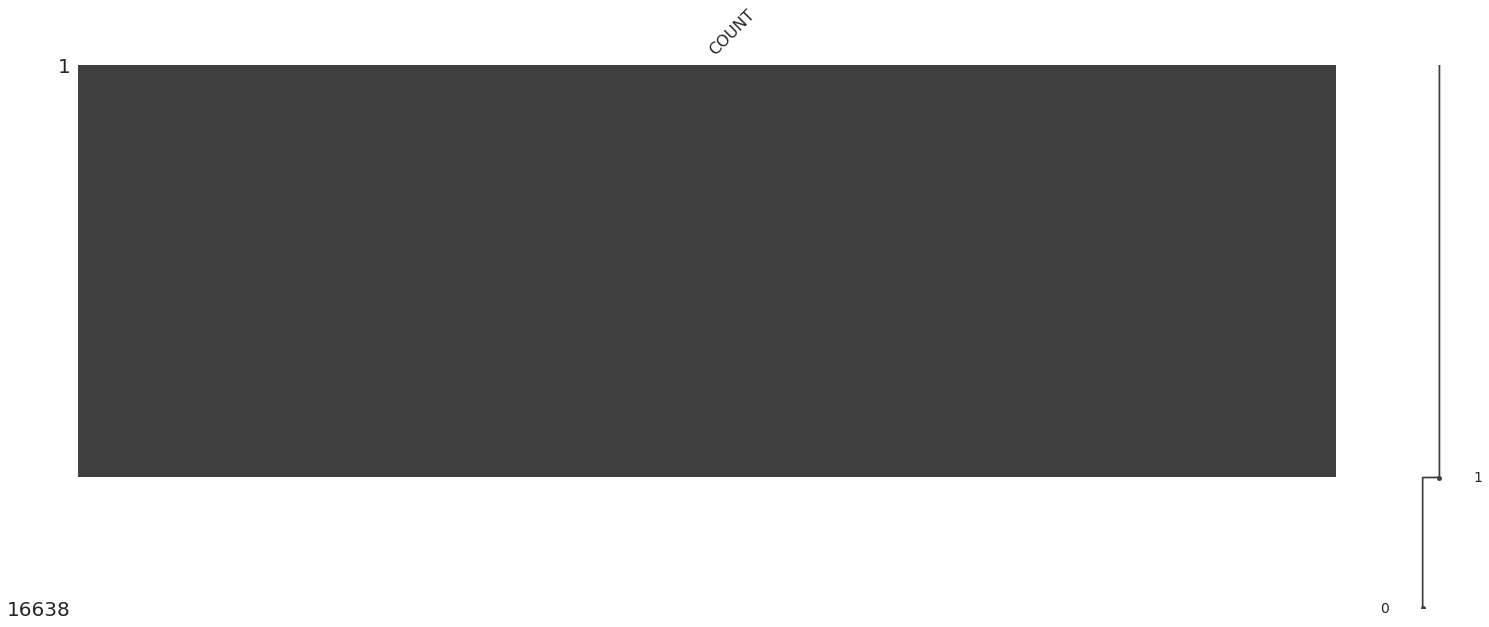

CPU times: user 1.09 s, sys: 4.41 s, total: 5.51 s
Wall time: 456 ms


In [32]:
%%time
#### Analyze Missing Values
filtered_msnoData = msno.nullity_sort(msno.nullity_filter(SampledOPMDataProf, filter='bottom', n=15, p=0.999), sort='descending')
msno.matrix(filtered_msnoData)

del filtered_msnoData

In [33]:
%%time
##Admin Data Sampling
if os.path.isfile(PickleJarPath+"/SampledOPMDataAdmin.pkl"):
    print("Found the File! Loading Pickle Now!")
    SampledOPMDataAdmin = unpickleObject("SampledOPMDataAdmin")
else:
    SampledOPMDataAdmin= SampleStrata(stratumAdmin, OPMDataMergedAdmin, "SampledOPMDataAdmin")

Stratum Sample Size Calculations for SEP: NS


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201412,B,2077,NS,2087084,0.000995,4000.0,4
1,201412,C,19966,NS,2087084,0.009566,4000.0,38
2,201412,D,46086,NS,2087084,0.022082,4000.0,88
3,201412,E,50390,NS,2087084,0.024144,4000.0,97
4,201412,F,59393,NS,2087084,0.028457,4000.0,114


totalStratumSampleSize:  4001
Stratum Sample Size Calculations for SEP: SA


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,B,4,SA,9252,0.000432,4000.0,2
1,201410,C,65,SA,9252,0.007026,4000.0,28
2,201410,D,157,SA,9252,0.016969,4000.0,68
3,201410,E,106,SA,9252,0.011457,4000.0,46
4,201410,F,119,SA,9252,0.012862,4000.0,51


totalStratumSampleSize:  4002
Stratum Sample Size Calculations for SEP: SC


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,B,19,SC,9156,0.002075,4000.0,8
1,201410,C,94,SC,9156,0.010266,4000.0,41
2,201410,D,173,SC,9156,0.018895,4000.0,76
3,201410,E,134,SC,9156,0.014635,4000.0,59
4,201410,F,81,SC,9156,0.008847,4000.0,35


totalStratumSampleSize:  4000
Stratum Sample Size Calculations for SEP: SD


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,C,3,SD,21366,0.000140,4000.0,1
1,201410,D,3,SD,21366,0.000140,4000.0,1
2,201410,E,2,SD,21366,0.000094,4000.0,0
3,201410,F,11,SD,21366,0.000515,4000.0,2
4,201410,G,19,SD,21366,0.000889,4000.0,4


totalStratumSampleSize:  4000
Stratum Sample Size Calculations for SEP: SH


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,H,1,SH,39,0.025641,39.0,1
1,201410,I,2,SH,39,0.051282,39.0,2
2,201412,D,1,SH,39,0.025641,39.0,1
3,201412,E,1,SH,39,0.025641,39.0,1
4,201412,F,1,SH,39,0.025641,39.0,1


totalStratumSampleSize:  39
Stratum Sample Size Calculations for SEP: SI


,DATECODE,AGELVL,StratCount,SEP,TotalCount,p,StratCountSample,StratSampleSize
0,201410,C,6,SI,1196,0.005017,1196.0,6
1,201410,D,6,SI,1196,0.005017,1196.0,6
2,201410,E,14,SI,1196,0.011706,1196.0,14
3,201410,F,12,SI,1196,0.010033,1196.0,12
4,201410,G,15,SI,1196,0.012542,1196.0,15


totalStratumSampleSize:  1196
NS 201412 B 4
NS 201412 C 38
NS 201412 D 88
NS 201412 E 97
NS 201412 F 114
NS 201412 G 166
NS 201412 H 209
NS 201412 I 165
NS 201412 J 92
NS 201412 K 40
NS 201503 B 4
NS 201503 C 37
NS 201503 D 87
NS 201503 E 98
NS 201503 F 113
NS 201503 G 164
NS 201503 H 207
NS 201503 I 163
NS 201503 J 90
NS 201503 K 38
NS 201506 B 4
NS 201506 C 36
NS 201506 D 86
NS 201506 E 98
NS 201506 F 111
NS 201506 G 161
NS 201506 H 205
NS 201506 I 162
NS 201506 J 90
NS 201506 K 37
NS 201509 B 4
NS 201509 C 35
NS 201509 D 86
NS 201509 E 101
NS 201509 F 111
NS 201509 G 161
NS 201509 H 206
NS 201509 I 164
NS 201509 J 91
NS 201509 K 38
SA 201410 B 2
SA 201410 C 28
SA 201410 D 68
SA 201410 E 46
SA 201410 F 51
SA 201410 G 61
SA 201410 H 53
SA 201410 I 24
SA 201410 J 6
SA 201410 K 1
SA 201411 B 3
SA 201411 C 32
SA 201411 D 71
SA 201411 E 65
SA 201411 F 75
SA 201411 G 67
SA 201411 H 59
SA 201411 I 37
SA 201411 J 10
SA 201411 K 3
SA 201412 C 17
SA 201412 D 34
SA 201412 E 38
SA 201412 F 32
SA

In [34]:
%%time
print(len(SampledOPMDataAdmin))
display(SampledOPMDataAdmin.head())
display(pd.DataFrame({'StratCount' : SampledOPMDataAdmin.groupby(["SEP"]).size()}).reset_index())

17238


,SEP,DATECODE,AGELVL,GSEGRD,LOC,PATCO,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,QTR,AGELVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate
0,NS,201412,B,7.0,42,2,C,30,F,NaN,39179.0,0.5,1,20-24,1,United States,42-PENNSYLVANIA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$30,000 - $39,999",1,Permanent,30-Excepted Service - Schedule A,1,Full-time,Full-time Nonseasonal,482.0,558,44301.350294,-5122.350294,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
1,NS,201412,B,7.0,12,2,C,15,F,NaN,39179.0,2.3,1,20-24,1,United States,12-FLORIDA,1,White Collar,03,"03xx-GENERAL ADMIN, CLERICAL, & OFFICE SVCS",Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$30,000 - $39,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,482.0,769,44301.350294,-5122.350294,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
2,NS,201412,B,7.0,27,2,D,35,F,NaN,41512.0,0.5,1,20-24,1,United States,27-MINNESOTA,1,White Collar,09,09xx-LEGAL AND KINDRED,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$40,000 - $49,999",1,Permanent,35-Excepted Service - Schedule D,1,Full-time,Full-time Nonseasonal,60.0,182,42440.609454,-928.609454,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
3,NS,201412,B,9.0,48,2,E,15,F,NaN,54573.0,2.8,1,20-24,1,United States,48-TEXAS,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$50,000 - $59,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,498.0,1406,61424.170625,-6851.170625,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
4,NS,201412,C,12.0,11,2,G,15,F,NaN,78142.0,3.0,1,25-29,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,22,22xx-INFORMATION TECHNOLOGY,Administrative,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$70,000 - $79,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,498.0,1260,85141.768812,-6999.768812,25.0,32.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1


,SEP,StratCount
0,NS,4001
1,SA,4002
2,SC,4000
3,SD,4000
4,SH,39
5,SI,1196


CPU times: user 78.2 ms, sys: 9.12 ms, total: 87.3 ms
Wall time: 77.6 ms


/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


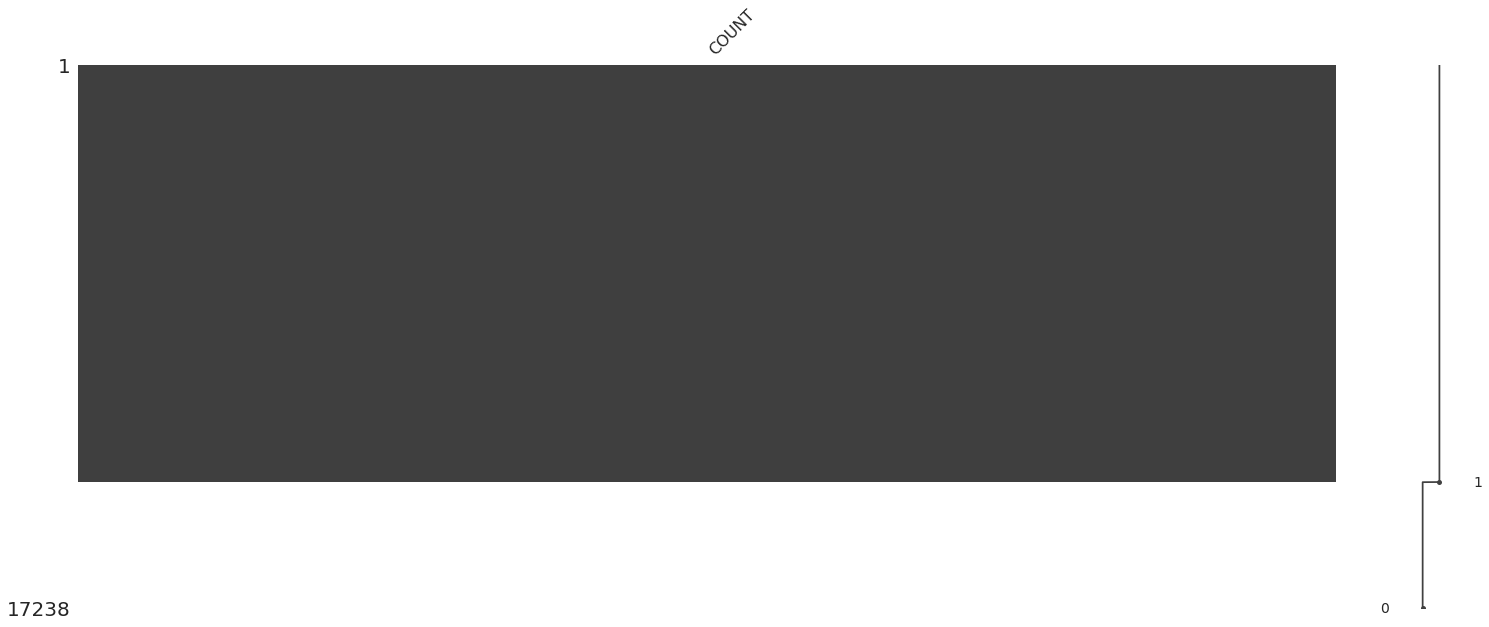

CPU times: user 371 ms, sys: 307 ms, total: 679 ms
Wall time: 312 ms


In [35]:
%%time
#### Analyze Missing Values
filtered_msnoData = msno.nullity_sort(msno.nullity_filter(SampledOPMDataAdmin, filter='bottom', n=15, p=0.999), sort='descending')
msno.matrix(filtered_msnoData)

del filtered_msnoData

In [36]:
%%time
## Describe Summary for our Model Professional Subgroup for Modeling
display(SampledOPMDataProf.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
GSEGRD,16638.0,12.138118,1.734298,7.000000,11.000000,12.000000,13.000000,15.000000
COUNT,12635.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SALARY,16638.0,94989.438094,30376.972813,39179.000000,73444.000000,90344.000000,111988.500000,326293.000000
LOS,16638.0,13.674408,11.832424,0.000000,4.500000,9.000000,22.900000,71.500000
SEPCount_EFDATE_OCC,16638.0,150.025844,162.239891,1.000000,33.000000,83.000000,240.000000,708.000000
SEPCount_EFDATE_LOC,16638.0,739.177726,494.479945,30.000000,316.000000,596.000000,1123.000000,2791.000000
IndAvgSalary,16638.0,94678.112257,29101.241575,40129.225806,70610.296346,86204.977852,105814.494876,224893.272727
SalaryOverUnderIndAvg,16638.0,311.325836,9844.071820,-114403.045059,-5549.000502,-119.923867,6466.667452,125012.771739
LowerLimitAge,16638.0,45.535221,12.806462,20.000000,35.000000,45.000000,55.000000,65.000000
YearsToRetirement,16638.0,11.464779,12.806462,-8.000000,2.000000,12.000000,22.000000,37.000000


CPU times: user 63.9 ms, sys: 82 ms, total: 146 ms
Wall time: 51.6 ms


In [ ]:
#%%time

#OPMDataMerged.to_csv("OPMDataMerged.csv")

In [ ]:
#os.path.getsize("OPMDataMerged.csv") #Display file size in bytes

### Review Visualizations post-Data removal and sampling

### Encode Categorical Attributes, and Remove Description Columns for Analysis Prep

Now that we have the dataset sampled, we still have some legwork necessary to convert our categorical attributes into binary integer values. Below we walk through this process for the following Attributes:
- AGELVL
- LOC
- SALLVL
- TOA
- OCCTYP
- OCCFAM
- PPTYP
- PPGROUP
- TOATYP

Once these attributes have been encoded and description columns removed, we end up with a total of 2446 attributes in our dataset for analysis in our model generation.

In [37]:
# Clean up old objects no longer needed, to clear up memory
process = psutil.Process(os.getpid())
print("Memory Usage before Cleanup: ", process.memory_info().rss)

if 'AGELVL' in dir():
    del AGELVL
if 'AggIndAvgSalary' in dir():
    del AggIndAvgSalary
if 'AggIndAvgSalary2' in dir():
    del AggIndAvgSalary2
if 'AggSEPCount_EFDATE_LOC' in dir():
    del AggSEPCount_EFDATE_LOC
if 'AggSEPCount_EFDATE_OCC' in dir():
    del AggSEPCount_EFDATE_OCC
if 'AggStrat' in dir():
    del AggStrat
if 'DATECODE' in dir():
    del DATECODE
if 'EMPColList' in dir():
    del EMPColList
if 'EMPDataOrig4Q' in dir():
    del EMPDataOrig4Q
if 'maxSize' in dir():
    del maxSize
if 'OPMColList' in dir():
    del OPMColList
if 'OPMDataFiles' in dir():
    del OPMDataFiles
if 'OPMDataList' in dir():
    del OPMDataList
if 'OPMDataMerged' in dir():
    del OPMDataMerged
if 'OPMDataOrig' in dir():
    del OPMDataOrig
if 'SEP' in dir():
    del SEP
if 'SampleSize' in dir():
    del SampleSize
if 'SampledOPMStratumData' in dir():
    del SampledOPMStratumData
if 'SampledOPMStratumDataList' in dir():
    del SampledOPMStratumDataList
if 'StratCountSample' in dir():
    del StratCountSample
if 'StratSampleSize' in dir():
    del StratSampleSize
if 'JTL' in dir():
    del JTL
    
process = psutil.Process(os.getpid())
print("Memory Usage after Cleanup: ", process.memory_info().rss)

Memory Usage before Cleanup:  12869775360
Memory Usage after Cleanup:  11229941760


In [38]:
display(SampledOPMDataProf.head())
SampledOPMDataProf.info()

,SEP,DATECODE,AGELVL,GSEGRD,LOC,PATCO,SALLVL,TOA,WORKSCH,COUNT,SALARY,LOS,QTR,AGELVLT,LOCTYP,LOCTYPT,LOCT,OCCTYP,OCCTYPT,OCCFAM,OCCFAMT,PATCOT,PPTYP,PPTYPT,PPGROUP,PPGROUPT,SALLVLT,TOATYP,TOATYPT,TOAT,WSTYP,WSTYPT,WORKSCHT,SEPCount_EFDATE_OCC,SEPCount_EFDATE_LOC,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate
0,NS,201412,B,11.0,34,1,F,15,F,NaN,65377.0,2.4,1,20-24,1,United States,34-NEW JERSEY,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$60,000 - $69,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,50.0,233,66358.662093,-981.662093,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
1,NS,201412,B,7.0,11,1,D,20,F,NaN,42631.0,0.7,1,20-24,1,United States,11-DISTRICT OF COLUMBIA,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$40,000 - $49,999",2,Non-permanent,20-Competitive Service,1,Full-time,Full-time Nonseasonal,3.0,1260,42631.000000,0.000000,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
2,NS,201412,B,11.0,51,1,G,15,F,NaN,77658.0,2.3,1,20-24,1,United States,51-VIRGINIA,1,White Collar,12,"12xx-COPYRIGHT, PATENT, AND TRADE-MARK",Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$70,000 - $79,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,26.0,1133,78919.462629,-1261.462629,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
3,NS,201412,B,9.0,30,1,D,15,F,NaN,47923.0,3.4,1,20-24,1,United States,30-MONTANA,1,White Collar,13,13xx-PHYSICAL SCIENCES,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$40,000 - $49,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,9.0,198,53700.843750,-5777.843750,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1
4,NS,201412,B,7.0,42,1,E,15,F,NaN,54911.0,5.0,1,20-24,1,United States,42-PENNSYLVANIA,1,White Collar,08,08xx-ENGINEERING AND ARCHITECTURE,Professional,1,General Schedule and Equivalently Graded (GSEG...,11,Standard GSEG Pay Plans,"$50,000 - $59,999",1,Permanent,15-Competitive Service - Career-Conditional,1,Full-time,Full-time Nonseasonal,23.0,558,49910.782051,5000.217949,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 49 columns):
SEP                              16638 non-null object
DATECODE                         16638 non-null object
AGELVL                           16638 non-null object
GSEGRD                           16638 non-null float64
LOC                              16638 non-null object
PATCO                            16638 non-null object
SALLVL                           16638 non-null object
TOA                              16638 non-null object
WORKSCH                          16638 non-null object
COUNT                            12635 non-null float64
SALARY                           16638 non-null float64
LOS                              16638 non-null float64
QTR                              16638 non-null object
AGELVLT                          16638 non-null object
LOCTYP                           16638 non-null object
LOCTYPT                          16638 non-null object
LOCT   

In [57]:
%%time

if os.path.isfile(PickleJarPath+"/OPMAnalysisDataNoFam.pkl"):
    print("Found the File! Loading Pickle Now!")
    OPMAnalysisDataNoFam = unpickleObject("OPMAnalysisDataNoFam")
else:

    OPMAnalysisDataNoFam = SampledOPMDataProf.copy()

    cols = ["GENDER",
            "DATECODE",
            "COUNT",
            "AGYTYPT",
            "AGYT",
            "AGYSUB",
            "AGYSUBT",
            "QTR",
            "AGELVLT",
            "LOSLVL",
            "LOSLVLT",
            "LOCTYPT",
            "LOCT",
            "OCCTYP",
            "OCCTYPT",
            "OCCFAM",
            "OCCFAMT",
            "OCC",
            "OCCT",
            "PATCO",
            "PPGRD",
            "PATCOT",
            "PPTYPT",
            "PPGROUPT",
            "PAYPLAN",
            "PAYPLANT",
            "SALLVLT",
            "TOATYPT",
            "TOAT",
            "WSTYP",
            "WSTYPT",
            "WORKSCH",
            "WORKSCHT",
            "SALARY",
            "LOS",
            "SEPCount_EFDATE_OCC",
            "SEPCount_EFDATE_LOC"
           ]



    #delete cols from analysis data
    for col in cols:
        if col in list(OPMAnalysisDataNoFam.columns):
            del OPMAnalysisDataNoFam[col]

    OPMAnalysisDataNoFam.info()

    cols = ["AGELVL",
            "LOC",
            "SALLVL",
            "TOA",
            "AGYTYP",
            "AGY",
            "LOCTYP",
            "PPTYP",
            "PPGROUP",
            "TOATYP"
           ]

    #Split Values for cols 
    for col in cols:
        if col in list(OPMAnalysisDataNoFam.columns):
            AttSplit = pd.get_dummies(OPMAnalysisDataNoFam[col],prefix=col)
            display(AttSplit.head())
            OPMAnalysisDataNoFam = pd.concat((OPMAnalysisDataNoFam,AttSplit),axis=1) # add back into the dataframe
            del OPMAnalysisDataNoFam[col]

    pickleObject(OPMAnalysisDataNoFam, "OPMAnalysisData")
        
display(OPMAnalysisDataNoFam.head())
print("Number of Columns: ",len(OPMAnalysisDataNoFam.columns))
OPMAnalysisDataNoFam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 24 columns):
SEP                              16638 non-null object
AGELVL                           16638 non-null object
GSEGRD                           16638 non-null float64
LOC                              16638 non-null object
SALLVL                           16638 non-null object
TOA                              16638 non-null object
LOCTYP                           16638 non-null object
PPTYP                            16638 non-null object
PPGROUP                          16638 non-null object
TOATYP                           16638 non-null object
IndAvgSalary                     16638 non-null float64
SalaryOverUnderIndAvg            16638 non-null float64
LowerLimitAge                    16638 non-null float64
YearsToRetirement                16638 non-null float64
BLS_FEDERAL_OtherSep_Rate        16638 non-null float64
BLS_FEDERAL_Quits_Rate           16638 non-null float64
BLS_

,AGELVL_B,AGELVL_C,AGELVL_D,AGELVL_E,AGELVL_F,AGELVL_G,AGELVL_H,AGELVL_I,AGELVL_J,AGELVL_K
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


,LOC_01,LOC_02,LOC_04,LOC_05,LOC_06,LOC_08,LOC_09,LOC_10,LOC_11,LOC_12,LOC_13,LOC_15,LOC_16,LOC_17,LOC_18,LOC_19,LOC_20,LOC_21,LOC_22,LOC_23,LOC_24,LOC_25,LOC_26,LOC_27,LOC_28,LOC_29,LOC_30,LOC_31,LOC_32,LOC_33,LOC_34,LOC_35,LOC_36,LOC_37,LOC_38,LOC_39,LOC_40,LOC_41,LOC_42,LOC_44,LOC_45,LOC_46,LOC_47,LOC_48,LOC_49,LOC_50,LOC_51,LOC_53,LOC_54,LOC_55,LOC_56
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


,SALLVL_C,SALLVL_D,SALLVL_E,SALLVL_F,SALLVL_G,SALLVL_H,SALLVL_I,SALLVL_J,SALLVL_K,SALLVL_L,SALLVL_M,SALLVL_N,SALLVL_O,SALLVL_P,SALLVL_Q,SALLVL_R
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


,TOA_10,TOA_15,TOA_20,TOA_30,TOA_32,TOA_35,TOA_38,TOA_40,TOA_42,TOA_44,TOA_45,TOA_48
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


,LOCTYP_1
0,1
1,1
2,1
3,1
4,1


,PPTYP_1
0,1
1,1
2,1
3,1
4,1


,PPGROUP_11,PPGROUP_12
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


,TOATYP_1,TOATYP_2
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


,SEP,GSEGRD,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate,AGELVL_B,AGELVL_C,AGELVL_D,AGELVL_E,AGELVL_F,AGELVL_G,AGELVL_H,AGELVL_I,AGELVL_J,AGELVL_K,LOC_01,LOC_02,LOC_04,LOC_05,LOC_06,LOC_08,LOC_09,LOC_10,LOC_11,LOC_12,LOC_13,LOC_15,LOC_16,LOC_17,LOC_18,LOC_19,LOC_20,LOC_21,LOC_22,LOC_23,LOC_24,LOC_25,LOC_26,LOC_27,LOC_28,LOC_29,LOC_30,LOC_31,LOC_32,LOC_33,LOC_34,LOC_35,LOC_36,LOC_37,LOC_38,LOC_39,LOC_40,LOC_41,LOC_42,LOC_44,LOC_45,LOC_46,LOC_47,LOC_48,LOC_49,LOC_50,LOC_51,LOC_53,LOC_54,LOC_55,LOC_56,SALLVL_C,SALLVL_D,SALLVL_E,SALLVL_F,SALLVL_G,SALLVL_H,SALLVL_I,SALLVL_J,SALLVL_K,SALLVL_L,SALLVL_M,SALLVL_N,SALLVL_O,SALLVL_P,SALLVL_Q,SALLVL_R,TOA_10,TOA_15,TOA_20,TOA_30,TOA_32,TOA_35,TOA_38,TOA_40,TOA_42,TOA_44,TOA_45,TOA_48,LOCTYP_1,PPTYP_1,PPGROUP_11,PPGROUP_12,TOATYP_1,TOATYP_2
0,NS,11.0,66358.662093,-981.662093,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0
1,NS,7.0,42631.000000,0.000000,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1
2,NS,11.0,78919.462629,-1261.462629,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0
3,NS,9.0,53700.843750,-5777.843750,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0
4,NS,7.0,49910.782051,5000.217949,20.0,37.0,0.5,0.4,30,2.2,12,10,62,0.3,7,1.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0


Number of Columns:  111
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Columns: 111 entries, SEP to TOATYP_2
dtypes: float64(10), int64(5), object(1), uint8(95)
memory usage: 3.5+ MB
CPU times: user 317 ms, sys: 10.1 ms, total: 327 ms
Wall time: 809 ms


Below is a display of all remaining attributes and their corresponding data types for analysis

In [59]:
%%time

data_type = []
for idx, col in enumerate(OPMAnalysisDataNoFam.columns):
    data_type.append(OPMAnalysisDataNoFam.dtypes[idx])

summary_df = {'Attribute Name' : pd.Series(OPMAnalysisDataNoFam.columns, index = range(len(OPMAnalysisDataNoFam.columns))), 'Data Type' : pd.Series(data_type, index = range(len(OPMAnalysisDataNoFam.columns)))}
summary_df = pd.DataFrame(summary_df)
display(summary_df)

del data_type, summary_df

,Attribute Name,Data Type
0,SEP,object
1,GSEGRD,float64
2,IndAvgSalary,float64
3,SalaryOverUnderIndAvg,float64
4,LowerLimitAge,float64
5,YearsToRetirement,float64
6,BLS_FEDERAL_OtherSep_Rate,float64
7,BLS_FEDERAL_Quits_Rate,float64
8,BLS_FEDERAL_TotalSep_Level,int64
9,BLS_FEDERAL_JobOpenings_Rate,float64


CPU times: user 55 ms, sys: 41 µs, total: 55.1 ms
Wall time: 54.2 ms


### Dimensionality Reduction using Principal Component Analysis

We also scale the data values to remove bias in our models due to different attribute scales. Without scaling the data, attributes such as SALARY and LOS would carry heavier weights when compared against the binary encoded attributes and BLS data. This would cause unbalanced and improperly analyzed data for model creation. 

#### need to fix missing values in sepcount attributes above.... then remove the .dropna()

In [68]:

OPMScaledAnalysisData = OPMAnalysisDataNoFam.copy()
del OPMScaledAnalysisData["SEP"]

In [69]:
%%time

OPMAnalysisScalerFit = StandardScaler().fit(OPMScaledAnalysisData)
## Pickle for later re-use if needed
pickleObject(OPMAnalysisScalerFit, "OPMAnalysisScalerFit")

OPMScaledAnalysisData = pd.DataFrame(OPMAnalysisScalerFit.transform(OPMScaledAnalysisData), columns = OPMScaledAnalysisData.columns)

CPU times: user 41.5 ms, sys: 146 µs, total: 41.6 ms
Wall time: 52.7 ms


In [70]:
display(OPMScaledAnalysisData.head())

,GSEGRD,IndAvgSalary,SalaryOverUnderIndAvg,LowerLimitAge,YearsToRetirement,BLS_FEDERAL_OtherSep_Rate,BLS_FEDERAL_Quits_Rate,BLS_FEDERAL_TotalSep_Level,BLS_FEDERAL_JobOpenings_Rate,BLS_FEDERAL_OtherSep_Level,BLS_FEDERAL_Quits_Level,BLS_FEDERAL_JobOpenings_Level,BLS_FEDERAL_Layoffs_Rate,BLS_FEDERAL_Layoffs_Level,BLS_FEDERAL_TotalSep_Rate,AGELVL_B,AGELVL_C,AGELVL_D,AGELVL_E,AGELVL_F,AGELVL_G,AGELVL_H,AGELVL_I,AGELVL_J,AGELVL_K,LOC_01,LOC_02,LOC_04,LOC_05,LOC_06,LOC_08,LOC_09,LOC_10,LOC_11,LOC_12,LOC_13,LOC_15,LOC_16,LOC_17,LOC_18,LOC_19,LOC_20,LOC_21,LOC_22,LOC_23,LOC_24,LOC_25,LOC_26,LOC_27,LOC_28,LOC_29,LOC_30,LOC_31,LOC_32,LOC_33,LOC_34,LOC_35,LOC_36,LOC_37,LOC_38,LOC_39,LOC_40,LOC_41,LOC_42,LOC_44,LOC_45,LOC_46,LOC_47,LOC_48,LOC_49,LOC_50,LOC_51,LOC_53,LOC_54,LOC_55,LOC_56,SALLVL_C,SALLVL_D,SALLVL_E,SALLVL_F,SALLVL_G,SALLVL_H,SALLVL_I,SALLVL_J,SALLVL_K,SALLVL_L,SALLVL_M,SALLVL_N,SALLVL_O,SALLVL_P,SALLVL_Q,SALLVL_R,TOA_10,TOA_15,TOA_20,TOA_30,TOA_32,TOA_35,TOA_38,TOA_40,TOA_42,TOA_44,TOA_45,TOA_48,LOCTYP_1,PPTYP_1,PPGROUP_11,PPGROUP_12,TOATYP_1,TOATYP_2
0,-0.656261,-0.973165,-0.131351,-1.993992,1.993992,0.846293,-0.790819,-0.740005,-0.648267,0.026027,-0.969791,-0.684201,-0.74492,-0.913097,-0.678292,11.4021,-0.292585,-0.385328,-0.357771,-0.328549,-0.323472,-0.349163,-0.407762,-0.38728,-0.32765,-0.130356,-0.08805,-0.152677,-0.080831,-0.272108,-0.176744,-0.067741,-0.040317,-0.350029,-0.190559,-0.193921,-0.125996,-0.079693,-0.149135,-0.089767,-0.05653,-0.089767,-0.099159,-0.106617,-0.062626,-0.306994,-0.121998,-0.106617,-0.085946,-0.099159,-0.13412,-0.081953,-0.06863,-0.07931,-0.04458,8.699012,-0.134584,-0.153704,-0.138467,-0.05653,-0.167299,-0.125503,-0.108617,-0.165391,-0.04458,-0.097602,-0.0863,-0.09506,-0.262165,-0.108049,-0.036387,-0.330118,-0.174379,-0.083427,-0.078151,-0.061158,-0.049702,-0.149556,-0.264774,2.792583,-0.440325,-0.38502,-0.410264,-0.324039,-0.291373,-0.240678,-0.215594,-0.160926,-0.218479,-0.073335,-0.04721,-0.100997,-1.392873,2.639771,-0.120210,-0.262689,-0.036387,-0.078151,-0.341861,-0.1013,-0.049702,-0.023264,-0.010965,-0.103101,0.0,0.0,0.180506,-0.180506,0.198872,-0.198872
1,-2.962738,-1.788538,-0.031627,-1.993992,1.993992,0.846293,-0.790819,-0.740005,-0.648267,0.026027,-0.969791,-0.684201,-0.74492,-0.913097,-0.678292,11.4021,-0.292585,-0.385328,-0.357771,-0.328549,-0.323472,-0.349163,-0.407762,-0.38728,-0.32765,-0.130356,-0.08805,-0.152677,-0.080831,-0.272108,-0.176744,-0.067741,-0.040317,2.856903,-0.190559,-0.193921,-0.125996,-0.079693,-0.149135,-0.089767,-0.05653,-0.089767,-0.099159,-0.106617,-0.062626,-0.306994,-0.121998,-0.106617,-0.085946,-0.099159,-0.13412,-0.081953,-0.06863,-0.07931,-0.04458,-0.114956,-0.134584,-0.153704,-0.138467,-0.05653,-0.167299,-0.125503,-0.108617,-0.165391,-0.04458,-0.097602,-0.0863,-0.09506,-0.262165,-0.108049,-0.036387,-0.330118,-0.174379,-0.083427,-0.078151,-0.061158,-0.049702,6.686463,-0.264774,-0.358091,-0.440325,-0.38502,-0.410264,-0.324039,-0.291373,-0.240678,-0.215594,-0.160926,-0.218479,-0.073335,-0.04721,-0.100997,-1.392873,-0.378821,8.318806,-0.262689,-0.036387,-0.078151,-0.341861,-0.1013,-0.049702,-0.023264,-0.010965,-0.103101,0.0,0.0,0.180506,-0.180506,-5.028356,5.028356
2,-0.656261,-0.541528,-0.159775,-1.993992,1.993992,0.846293,-0.790819,-0.740005,-0.648267,0.026027,-0.969791,-0.684201,-0.74492,-0.913097,-0.678292,11.4021,-0.292585,-0.385328,-0.357771,-0.328549,-0.323472,-0.349163,-0.407762,-0.38728,-0.32765,-0.130356,-0.08805,-0.152677,-0.080831,-0.272108,-0.176744,-0.067741,-0.040317,-0.350029,-0.190559,-0.193921,-0.125996,-0.079693,-0.149135,-0.089767,-0.05653,-0.089767,-0.099159,-0.106617,-0.062626,-0.306994,-0.121998,-0.106617,-0.085946,-0.099159,-0.13412,-0.081953,-0.06863,-0.07931,-0.04458,-0.114956,-0.134584,-0.153704,-0.138467,-0.05653,-0.167299,-0.125503,-0.108617,-0.165391,-0.04458,-0.097602,-0.0863,-0.09506,-0.262165,-0.108049,-0.036387,3.029216,-0.174379,-0.083427,-0.078151,-0.061158,-0.049702,-0.149556,-0.264774,-0.358091,2.271048,-0.38502,-0.410

#### PCA Principal Components defined

Our objective, is to reduce dimensionality through identification of principal components. We have chosen 100 as the maximum number of components to be produced, given our hopes are to drastically reduce the number of attributes needed for a model. We will review each component's explained variance further to determine the proper number of components to be included later during model generation. Note randomized PCA was chosen in order to use singular value decomposition in our dimensionality reduction efforts due to the large size of our data set. 

In [71]:
%%time

seed = len(OPMScaledAnalysisData)

print(OPMScaledAnalysisData.shape)
pca_class = PCA(n_components=100, svd_solver='randomized', random_state=seed)

pca_class.fit(OPMScaledAnalysisData)

(16638, 110)
CPU times: user 4.98 s, sys: 19.4 s, total: 24.4 s
Wall time: 552 ms


Below, the resulting components have been ordered by eigenvector value and these values portrayed as ratios of variance explained by each component. In order to identify the principal components to be included during model generation, we review the rate at which explained variance decreases in significance from one principal component to the next. Accompanying these proportion values is a scree plot representing these same values in visual form. By plotting the scree plot, it is easier to judge where this rate of decreasing explained variance occurs. Note the rate of change in explained variance among the first 11 principal components, with another less significant change through the 20th component. After the 20th component, the rate of decreasing explained variance begins to somewhat flatten out, reducing to a < 0.03% change or less.

[ 5.28  4.15  2.98  2.52  2.18  2.14  1.61  1.36  1.3   1.23  1.16  1.15
  1.13  1.12  1.1   1.1   1.08  1.08  1.08  1.07  1.06  1.05  1.04  1.03
  1.03  1.02  1.01  1.    0.99  0.98  0.98  0.98  0.97  0.97  0.96  0.96
  0.95  0.95  0.95  0.95  0.94  0.94  0.94  0.94  0.94  0.94  0.94  0.94
  0.94  0.94  0.93  0.93  0.93  0.93  0.93  0.93  0.93  0.93  0.93  0.93
  0.93  0.92  0.92  0.92  0.92  0.92  0.92  0.91  0.91  0.91  0.91  0.9
  0.9   0.89  0.88  0.88  0.88  0.87  0.86  0.86  0.85  0.84  0.82  0.8
  0.76  0.7   0.67  0.63  0.53  0.5   0.41  0.06  0.04  0.03  0.01  0.01
  0.    0.    0.    0.  ]
CPU times: user 75.1 ms, sys: 5.38 ms, total: 80.5 ms
Wall time: 75 ms


/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


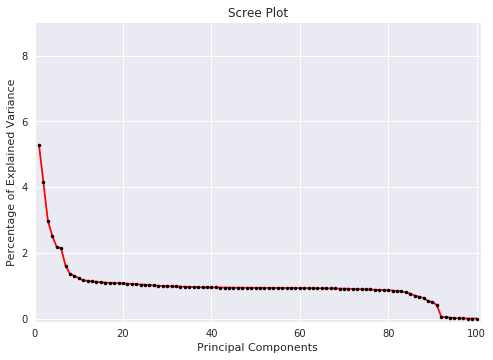

In [72]:
%%time

#The amount of variance that each PC explains
var= pca_class.explained_variance_ratio_

sns.set(font_scale=1)
plt.plot(range(1,101), var*100, marker = '.', color = 'red', markerfacecolor = 'black')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.axis([0, 101, -0.1, 9])

np.set_printoptions(suppress=True)
print(np.round(var, decimals=4)*100)

By now referring to the cumulative variance values and associated plot below, it may be seen that the cumulative variance increases in a fairly consistent parabola curve. In attempts to acheive a cumulative variance explained of greater than 50%, we end at 23 principal components. For this reason, 23 principal components may be selected as being the most appropriate for separation classification modeling given the variables among these data.

[   5.28    9.43   12.41   14.93   17.11   19.25   20.86   22.22   23.52
   24.75   25.91   27.06   28.19   29.31   30.41   31.51   32.59   33.67
   34.75   35.82   36.88   37.93   38.97   40.     41.03   42.05   43.06
   44.06   45.05   46.03   47.01   47.99   48.96   49.93   50.89   51.85
   52.8    53.75   54.7    55.65   56.59   57.53   58.47   59.41   60.35
   61.29   62.23   63.17   64.11   65.05   65.98   66.91   67.84   68.77
   69.7    70.63   71.56   72.49   73.42   74.35   75.28   76.2    77.12
   78.04   78.96   79.88   80.8    81.71   82.62   83.53   84.44   85.34
   86.24   87.13   88.01   88.89   89.77   90.64   91.5    92.36   93.21
   94.05   94.87   95.67   96.43   97.13   97.8    98.43   98.96   99.46
   99.87   99.93   99.97  100.    100.01  100.02  100.02  100.02  100.02
  100.02]


/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


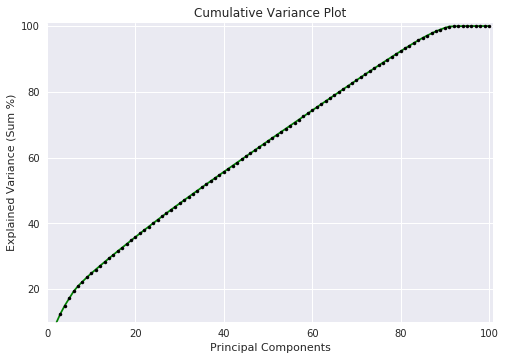

In [73]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca_class.explained_variance_ratio_, decimals=4)*100)

plt.plot(range(1,101), var1, marker = '.', color = 'green', markerfacecolor = 'black')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance (Sum %)')
plt.title('Cumulative Variance Plot')
plt.axis([0, 101, 10, 101])

print(var1)

We proceed to analyze the first 4 component Feature Loadings more carefully. See below, plots of the top 10 loadings for each component.

/usr/local/es7/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


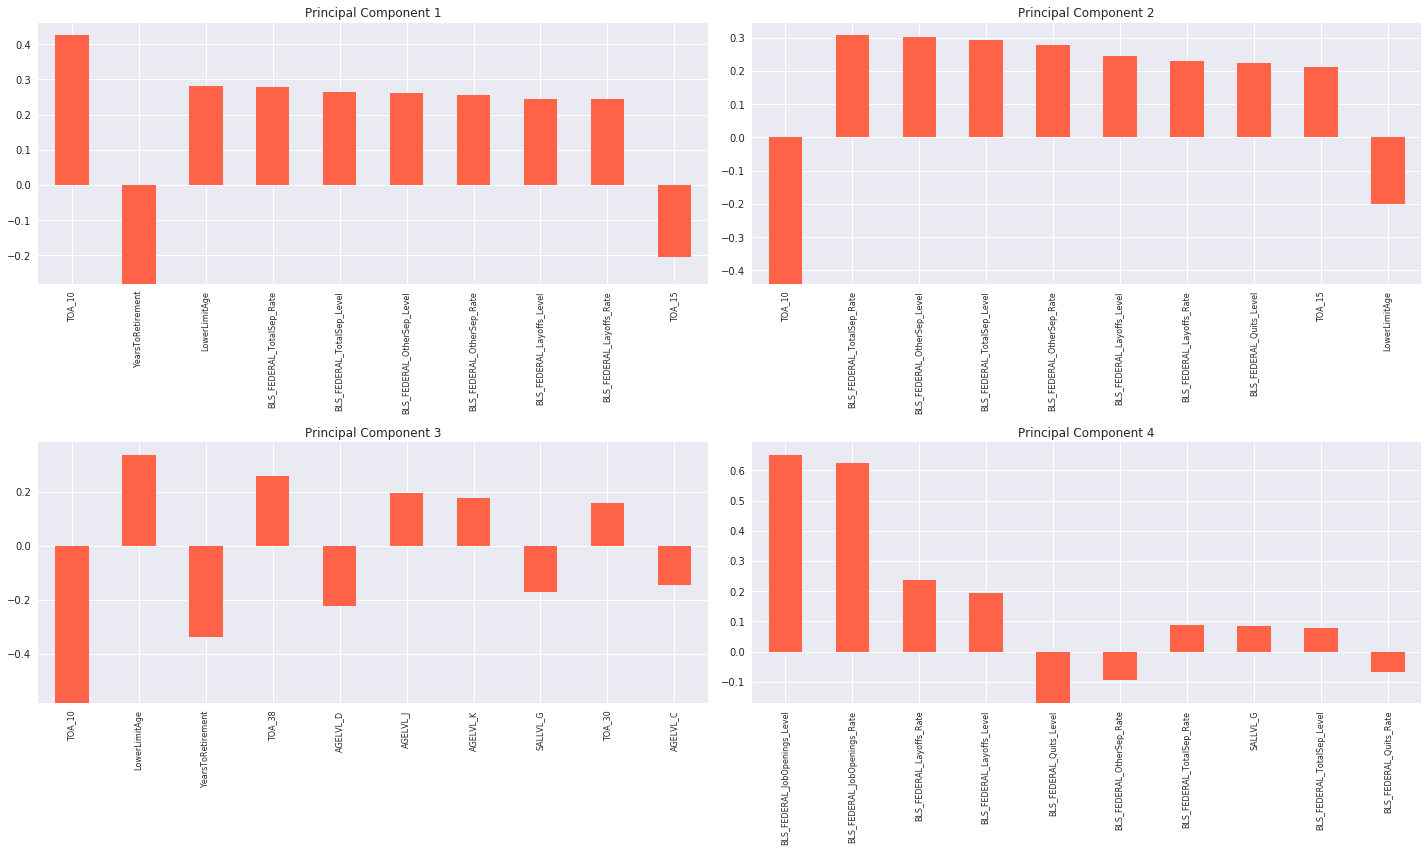

In [66]:

plt.rcParams['figure.figsize'] = (20, 12)
fig = plt.figure()

for i in range(0,4):
    components = pd.Series(pca_class.components_[i], index=OPMScaledAnalysisData.columns)

    maxcomponent = pd.Series(pd.DataFrame(abs(components).sort_values(ascending=False).head(10)).index)

    matplotlib.rc('xtick', labelsize=8)


    ax = fig.add_subplot(2,2,i + 1)
       
    weightsplot = pd.Series(components, index=maxcomponent)
    weightsplot.plot(title = "Principal Component "+ str(i+1), kind='bar', color = 'Tomato', ax = ax)

plt.tight_layout()
plt.show()

In [51]:
MaxPC = 23

PCList = []
for i in range(0,MaxPC):
    components = pd.Series(pca_class.components_[i], index=OPMScaledAnalysisData.columns)

    maxcomponent = pd.Series(pd.DataFrame(abs(components).sort_values(ascending=False).head(10)).index)
    PCList.append(maxcomponent)

PCList = pd.concat(PCList).drop_duplicates().sort_values(ascending=True).reset_index(drop = True)
print(PCList)

0                          AGELVL_C
1                          AGELVL_D
2                          AGELVL_E
3                          AGELVL_F
4                          AGELVL_G
5                          AGELVL_H
6                          AGELVL_I
7                          AGELVL_J
8                          AGELVL_K
9     BLS_FEDERAL_JobOpenings_Level
10     BLS_FEDERAL_JobOpenings_Rate
11        BLS_FEDERAL_Layoffs_Level
12         BLS_FEDERAL_Layoffs_Rate
13       BLS_FEDERAL_OtherSep_Level
14        BLS_FEDERAL_OtherSep_Rate
15          BLS_FEDERAL_Quits_Level
16           BLS_FEDERAL_Quits_Rate
17       BLS_FEDERAL_TotalSep_Level
18        BLS_FEDERAL_TotalSep_Rate
19                           GSEGRD
20                     IndAvgSalary
21                           LOC_11
22                           LOC_24
23                           LOC_51
24                    LowerLimitAge
25                        OCCFAM_01
26                        OCCFAM_04
27                        OC

Total of 83 features of the original 2441 are identified, by taking the top 10 feature loadings within the first 23 components as determined above as the appropriate components to maximize variance explained. We may now, optionally utilize these 83 features identified, or utilize principal component vectors for analysis in the next steps.